In [1]:
from preprocessing_last20 import *
import torch.optim as optim
from tqdm import tqdm
from mindiffusion.ddpm import DDPM
from mindiffusion.unet import NaiveUnet
device = torch.device('cuda:2')
train_data = train_data.to(device)

In [2]:
ddpm = DDPM(eps_model=NaiveUnet(1, 1, n_feat=128), betas=(1e-4, 0.02), n_T=400)
ddpm.to(device)

DDPM(
  (eps_model): NaiveUnet(
    (init_conv): Conv3(
      (main): Sequential(
        (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
      )
      (conv): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): GroupNorm(8, 128, eps=1e-05, affine=True)
        (5): ReLU()
      )
    )
    (down1): UnetDown(
      (model): Sequential(
        (0): Conv3(
          (main): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): GroupNorm(8, 128, eps=1e-05, affine=True)
            (2): ReLU()
          )
          (conv): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         

In [3]:
train_data = train_data.reshape(200, 1, 1, 64, 64)

In [4]:
ddpm.load_state_dict(torch.load("ddpm_batched_400_last20.pth"))

<All keys matched successfully>

In [4]:
def train_1_ep_ddpm(num_epoch, optim):

    print(f"Epoch {num_epoch} : ")
    ddpm.train()

    loss_ema = None
    

    train_data_tmp = train_data[torch.randperm(train_data.size()[0])]
    train_data_tmp = train_data_tmp.reshape(50, 4, 1, 64, 64)
    
    for i in tqdm(range(train_data_tmp.shape[0])):
        optim.zero_grad()
        loss = ddpm(train_data_tmp[i])
        loss.backward()
        if loss_ema is None:
            loss_ema = loss.item()
        else:
            loss_ema = 0.9 * loss_ema + 0.1 * loss.item()
        optim.step()
    print('loss',loss_ema)
    if num_epoch%20 == 1:
        ddpm.eval()
        with torch.no_grad():
            xh = ddpm.sample(3, (1, 64, 64), device)
            print(xh.shape)
            tensor_to_picture(xh[0].detach().cpu().numpy()[0])
            tensor_to_picture(xh[1].detach().cpu().numpy()[0])
            tensor_to_picture(xh[2].detach().cpu().numpy()[0])

    # save model
    torch.save(ddpm.state_dict(), f"./ddpm_batched_200_last20.pth")

In [5]:
def train_ddpm(epoch, lr, lr_decay, reg):
    for i in range(epoch):
        
        optim = torch.optim.SGD(ddpm.parameters(), lr=lr*lr_decay**i, momentum=0.9, weight_decay=reg)
        train_1_ep_ddpm(i, optim)

Epoch 0 : 


100%|██████████| 50/50 [00:04<00:00, 12.30it/s]


loss 0.2476250632284299
Epoch 1 : 


100%|██████████| 50/50 [00:03<00:00, 12.84it/s]


loss 0.22491600946830909
torch.Size([3, 1, 64, 64])


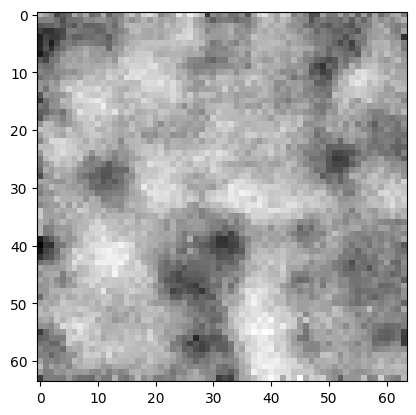

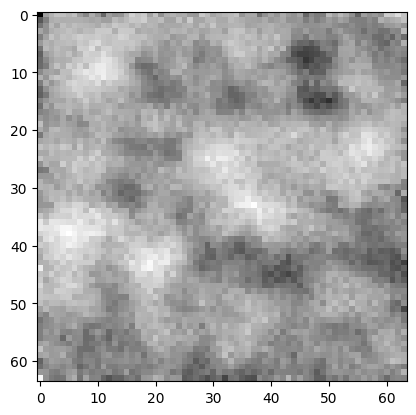

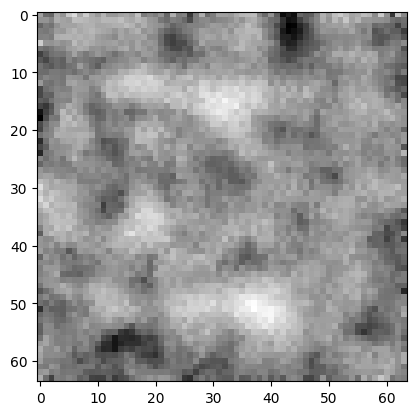

Epoch 2 : 


100%|██████████| 50/50 [00:04<00:00, 11.86it/s]


loss 0.19466038538674005
Epoch 3 : 


100%|██████████| 50/50 [00:03<00:00, 12.70it/s]


loss 0.18921683541660345
Epoch 4 : 


100%|██████████| 50/50 [00:04<00:00, 12.03it/s]


loss 0.1652897205551842
Epoch 5 : 


100%|██████████| 50/50 [00:04<00:00, 11.72it/s]


loss 0.14057537634052616
Epoch 6 : 


100%|██████████| 50/50 [00:04<00:00, 11.22it/s]


loss 0.13451886247147632
Epoch 7 : 


100%|██████████| 50/50 [00:03<00:00, 14.23it/s]


loss 0.1451225727866089
Epoch 8 : 


100%|██████████| 50/50 [00:04<00:00, 12.18it/s]


loss 0.12266271433013909
Epoch 9 : 


100%|██████████| 50/50 [00:03<00:00, 13.10it/s]


loss 0.15956949752433292
Epoch 10 : 


100%|██████████| 50/50 [00:04<00:00, 11.78it/s]


loss 0.17490770271818126
Epoch 11 : 


100%|██████████| 50/50 [00:04<00:00, 10.11it/s]


loss 0.16599224492065798
Epoch 12 : 


100%|██████████| 50/50 [00:03<00:00, 13.08it/s]


loss 0.21159948118567248
Epoch 13 : 


100%|██████████| 50/50 [00:04<00:00, 10.42it/s]


loss 0.13000730652751893
Epoch 14 : 


100%|██████████| 50/50 [00:03<00:00, 12.60it/s]


loss 0.15928481128502378
Epoch 15 : 


100%|██████████| 50/50 [00:03<00:00, 14.20it/s]


loss 0.15674291361456016
Epoch 16 : 


100%|██████████| 50/50 [00:04<00:00, 10.88it/s]


loss 0.18040345176235537
Epoch 17 : 


100%|██████████| 50/50 [00:03<00:00, 14.25it/s]


loss 0.1669371595995306
Epoch 18 : 


100%|██████████| 50/50 [00:03<00:00, 12.69it/s]


loss 0.14063124811439104
Epoch 19 : 


100%|██████████| 50/50 [00:04<00:00, 11.46it/s]


loss 0.14105408610329456
Epoch 20 : 


100%|██████████| 50/50 [00:04<00:00, 10.61it/s]


loss 0.12545883095159743
Epoch 21 : 


100%|██████████| 50/50 [00:04<00:00, 10.83it/s]


loss 0.1301752320512646
torch.Size([3, 1, 64, 64])


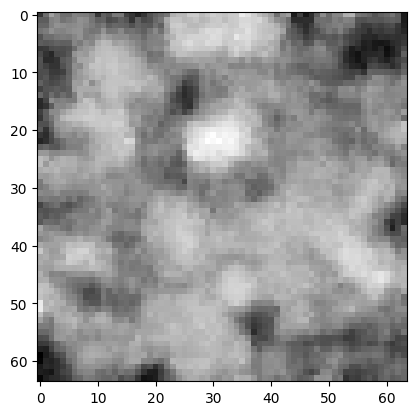

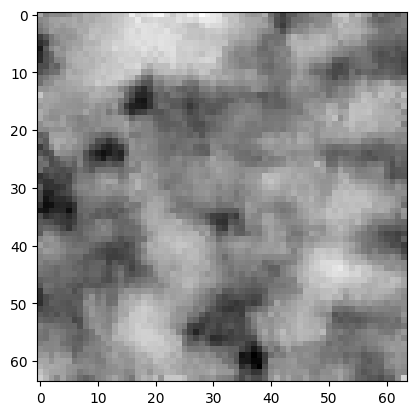

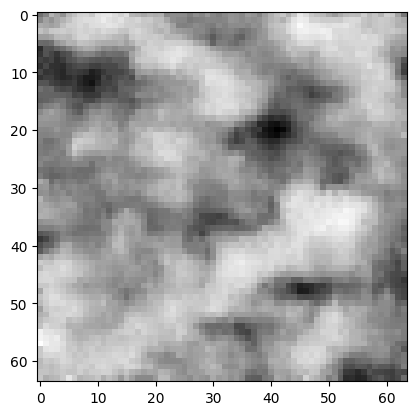

Epoch 22 : 


100%|██████████| 50/50 [00:04<00:00, 11.79it/s]


loss 0.14710031032443546
Epoch 23 : 


100%|██████████| 50/50 [00:03<00:00, 13.14it/s]


loss 0.13927384538884657
Epoch 24 : 


100%|██████████| 50/50 [00:04<00:00, 11.63it/s]


loss 0.16175193628365445
Epoch 25 : 


100%|██████████| 50/50 [00:03<00:00, 15.57it/s]


loss 0.15721847478288303
Epoch 26 : 


100%|██████████| 50/50 [00:04<00:00, 12.13it/s]


loss 0.1473888191673888
Epoch 27 : 


100%|██████████| 50/50 [00:04<00:00, 10.82it/s]


loss 0.16595306534730164
Epoch 28 : 


100%|██████████| 50/50 [00:03<00:00, 14.69it/s]


loss 0.11851934607645224
Epoch 29 : 


100%|██████████| 50/50 [00:03<00:00, 15.51it/s]


loss 0.14422621480923922
Epoch 30 : 


100%|██████████| 50/50 [00:04<00:00, 11.82it/s]


loss 0.18008777061999565
Epoch 31 : 


100%|██████████| 50/50 [00:03<00:00, 13.34it/s]


loss 0.16597889067787208
Epoch 32 : 


100%|██████████| 50/50 [00:04<00:00, 10.94it/s]


loss 0.12958794148945996
Epoch 33 : 


100%|██████████| 50/50 [00:03<00:00, 12.58it/s]


loss 0.19069264197212257
Epoch 34 : 


100%|██████████| 50/50 [00:03<00:00, 12.86it/s]


loss 0.11695011829270122
Epoch 35 : 


100%|██████████| 50/50 [00:04<00:00, 10.83it/s]


loss 0.13220582139766435
Epoch 36 : 


100%|██████████| 50/50 [00:03<00:00, 14.73it/s]


loss 0.1652776992691365
Epoch 37 : 


100%|██████████| 50/50 [00:04<00:00, 11.89it/s]


loss 0.16050946899102228
Epoch 38 : 


100%|██████████| 50/50 [00:04<00:00, 11.51it/s]


loss 0.11648655168149943
Epoch 39 : 


100%|██████████| 50/50 [00:04<00:00, 11.19it/s]


loss 0.11509873066983725
Epoch 40 : 


100%|██████████| 50/50 [00:03<00:00, 12.70it/s]


loss 0.14120777506094928
Epoch 41 : 


100%|██████████| 50/50 [00:04<00:00, 12.29it/s]


loss 0.09743409236343352
torch.Size([3, 1, 64, 64])


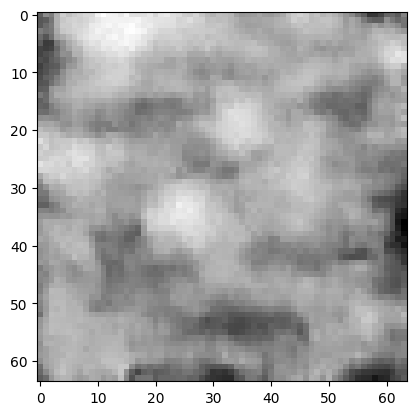

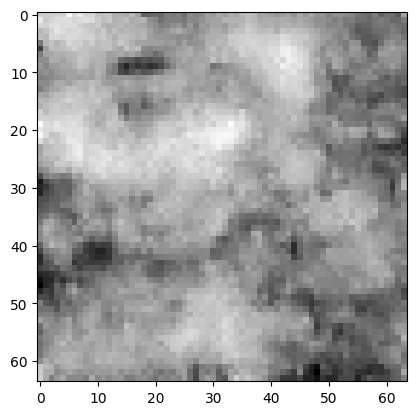

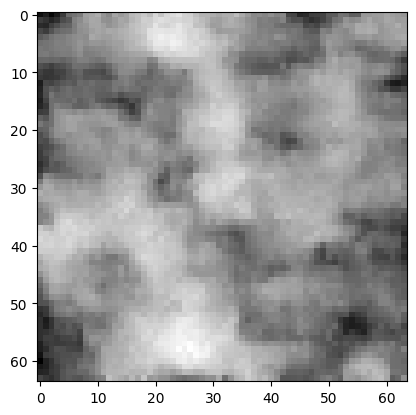

Epoch 42 : 


100%|██████████| 50/50 [00:04<00:00, 10.77it/s]


loss 0.1353432320005343
Epoch 43 : 


100%|██████████| 50/50 [00:04<00:00, 11.98it/s]


loss 0.13576105321675955
Epoch 44 : 


100%|██████████| 50/50 [00:04<00:00, 12.04it/s]


loss 0.17229883053845874
Epoch 45 : 


100%|██████████| 50/50 [00:03<00:00, 12.67it/s]


loss 0.11051856959274951
Epoch 46 : 


100%|██████████| 50/50 [00:03<00:00, 12.72it/s]


loss 0.12660458079232098
Epoch 47 : 


100%|██████████| 50/50 [00:04<00:00, 10.78it/s]


loss 0.11678078000156483
Epoch 48 : 


100%|██████████| 50/50 [00:03<00:00, 16.29it/s]


loss 0.13193619566695594
Epoch 49 : 


100%|██████████| 50/50 [00:04<00:00, 10.35it/s]


loss 0.1343188959625681
Epoch 50 : 


100%|██████████| 50/50 [00:04<00:00, 11.57it/s]


loss 0.14697084802768445
Epoch 51 : 


100%|██████████| 50/50 [00:04<00:00, 11.64it/s]


loss 0.15430370761782797
Epoch 52 : 


100%|██████████| 50/50 [00:03<00:00, 12.67it/s]


loss 0.12346453561429684
Epoch 53 : 


100%|██████████| 50/50 [00:04<00:00, 11.34it/s]


loss 0.1604791612152786
Epoch 54 : 


100%|██████████| 50/50 [00:04<00:00, 10.83it/s]


loss 0.15595113371482552
Epoch 55 : 


100%|██████████| 50/50 [00:04<00:00, 10.84it/s]


loss 0.15214437584809684
Epoch 56 : 


100%|██████████| 50/50 [00:04<00:00, 12.10it/s]


loss 0.13867722053689854
Epoch 57 : 


100%|██████████| 50/50 [00:03<00:00, 13.68it/s]


loss 0.1414540397736674
Epoch 58 : 


100%|██████████| 50/50 [00:04<00:00, 10.68it/s]


loss 0.13426223974427126
Epoch 59 : 


100%|██████████| 50/50 [00:03<00:00, 13.87it/s]


loss 0.14633353440595986
Epoch 60 : 


100%|██████████| 50/50 [00:03<00:00, 12.72it/s]


loss 0.1582179854947122
Epoch 61 : 


100%|██████████| 50/50 [00:04<00:00, 11.22it/s]


loss 0.14100458981576433
torch.Size([3, 1, 64, 64])


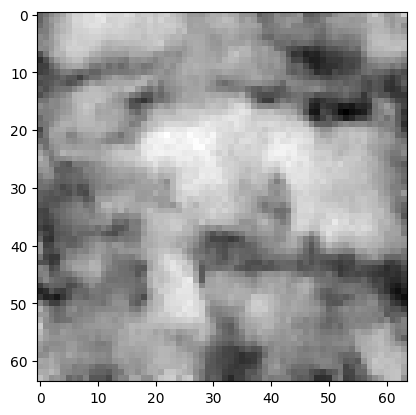

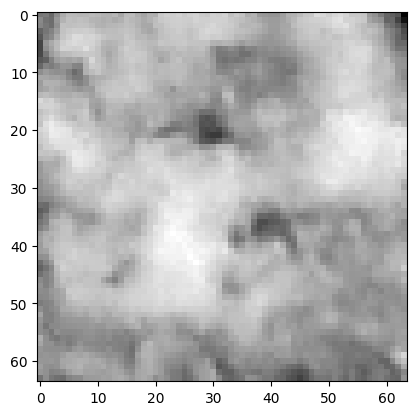

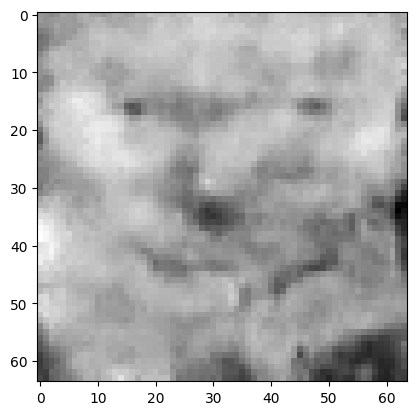

Epoch 62 : 


100%|██████████| 50/50 [00:04<00:00, 12.45it/s]


loss 0.1311619600930885
Epoch 63 : 


100%|██████████| 50/50 [00:04<00:00, 11.30it/s]


loss 0.15278936775652346
Epoch 64 : 


100%|██████████| 50/50 [00:03<00:00, 12.73it/s]


loss 0.1632344819246389
Epoch 65 : 


100%|██████████| 50/50 [00:04<00:00, 12.18it/s]


loss 0.13011559477163442
Epoch 66 : 


100%|██████████| 50/50 [00:04<00:00, 12.24it/s]


loss 0.11855063336219393
Epoch 67 : 


100%|██████████| 50/50 [00:04<00:00, 12.30it/s]


loss 0.1321940791785345
Epoch 68 : 


100%|██████████| 50/50 [00:04<00:00, 11.38it/s]


loss 0.1623617417773676
Epoch 69 : 


100%|██████████| 50/50 [00:04<00:00, 10.87it/s]


loss 0.13838020610663085
Epoch 70 : 


100%|██████████| 50/50 [00:04<00:00, 12.10it/s]


loss 0.12767430976989252
Epoch 71 : 


100%|██████████| 50/50 [00:04<00:00, 11.01it/s]


loss 0.12409736384359289
Epoch 72 : 


100%|██████████| 50/50 [00:04<00:00, 11.93it/s]


loss 0.12752520660695704
Epoch 73 : 


100%|██████████| 50/50 [00:03<00:00, 13.27it/s]


loss 0.13727598441447203
Epoch 74 : 


100%|██████████| 50/50 [00:03<00:00, 13.29it/s]


loss 0.10456150621256481
Epoch 75 : 


100%|██████████| 50/50 [00:03<00:00, 12.97it/s]


loss 0.1350578430971322
Epoch 76 : 


100%|██████████| 50/50 [00:05<00:00,  9.85it/s]


loss 0.12154036546628631
Epoch 77 : 


100%|██████████| 50/50 [00:03<00:00, 14.98it/s]


loss 0.1072044174757352
Epoch 78 : 


100%|██████████| 50/50 [00:04<00:00, 11.85it/s]


loss 0.12130702168163077
Epoch 79 : 


100%|██████████| 50/50 [00:04<00:00, 11.90it/s]


loss 0.10582832803722389
Epoch 80 : 


100%|██████████| 50/50 [00:04<00:00, 10.88it/s]


loss 0.13176524990627086
Epoch 81 : 


100%|██████████| 50/50 [00:04<00:00, 11.66it/s]


loss 0.10114054710538249
torch.Size([3, 1, 64, 64])


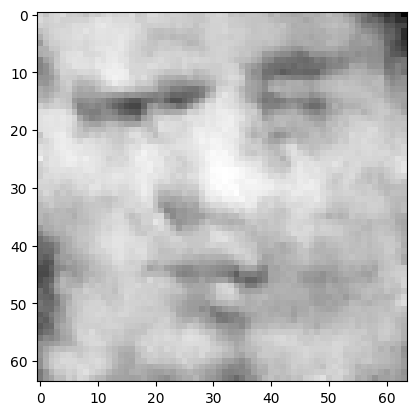

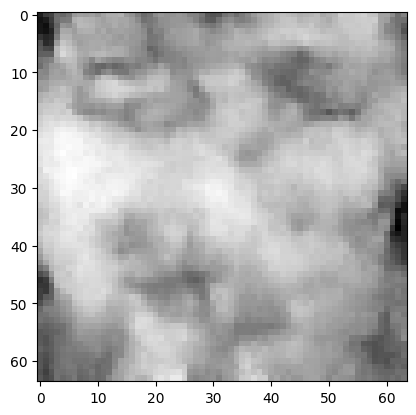

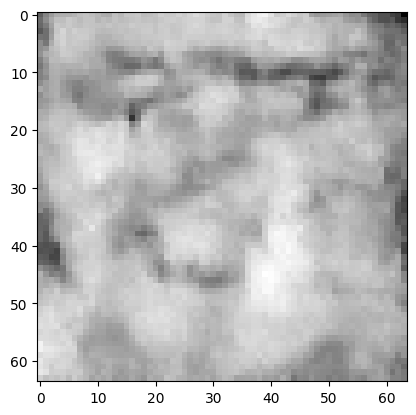

Epoch 82 : 


100%|██████████| 50/50 [00:04<00:00, 11.35it/s]


loss 0.1633909440397251
Epoch 83 : 


100%|██████████| 50/50 [00:03<00:00, 12.58it/s]


loss 0.11409761655178234
Epoch 84 : 


100%|██████████| 50/50 [00:04<00:00, 11.78it/s]


loss 0.16424488184436617
Epoch 85 : 


100%|██████████| 50/50 [00:04<00:00, 11.74it/s]


loss 0.10678414582870299
Epoch 86 : 


100%|██████████| 50/50 [00:03<00:00, 14.65it/s]


loss 0.17289078426756874
Epoch 87 : 


100%|██████████| 50/50 [00:03<00:00, 12.81it/s]


loss 0.12179307714815141
Epoch 88 : 


100%|██████████| 50/50 [00:04<00:00, 11.38it/s]


loss 0.1214860829868797
Epoch 89 : 


100%|██████████| 50/50 [00:03<00:00, 12.52it/s]


loss 0.14019190707077875
Epoch 90 : 


100%|██████████| 50/50 [00:04<00:00, 12.43it/s]


loss 0.09811883210608828
Epoch 91 : 


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]


loss 0.11877261774145242
Epoch 92 : 


100%|██████████| 50/50 [00:03<00:00, 12.97it/s]


loss 0.11696927007461443
Epoch 93 : 


100%|██████████| 50/50 [00:04<00:00, 10.57it/s]


loss 0.1256578098208248
Epoch 94 : 


100%|██████████| 50/50 [00:04<00:00, 11.11it/s]


loss 0.10974757219799262
Epoch 95 : 


100%|██████████| 50/50 [00:04<00:00, 10.53it/s]


loss 0.1324805753734341
Epoch 96 : 


100%|██████████| 50/50 [00:04<00:00, 12.02it/s]


loss 0.1461144744693038
Epoch 97 : 


100%|██████████| 50/50 [00:04<00:00, 12.22it/s]


loss 0.10757115539744345
Epoch 98 : 


100%|██████████| 50/50 [00:03<00:00, 13.62it/s]


loss 0.09417048043050115
Epoch 99 : 


100%|██████████| 50/50 [00:04<00:00, 12.50it/s]


loss 0.15375308744141442


In [6]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:04<00:00, 11.35it/s]


loss 0.16772965256169559
Epoch 1 : 


100%|██████████| 50/50 [00:04<00:00, 12.25it/s]


loss 0.10714333085350147
torch.Size([3, 1, 64, 64])


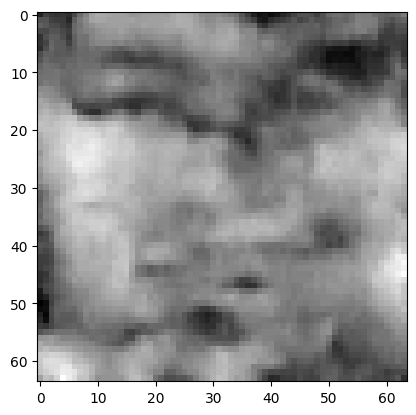

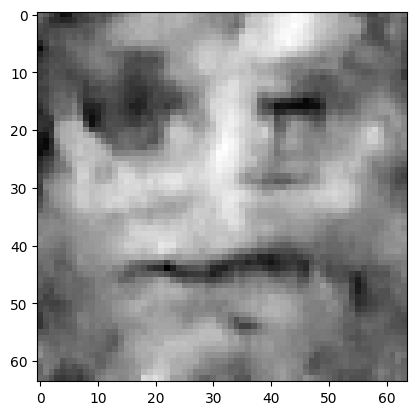

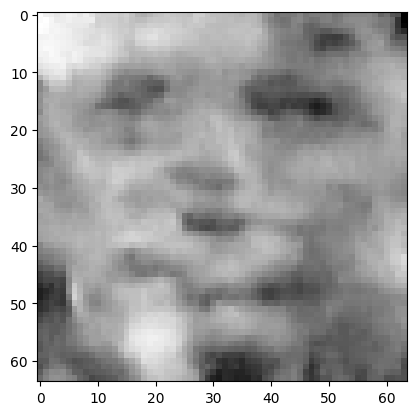

Epoch 2 : 


100%|██████████| 50/50 [00:04<00:00, 11.66it/s]


loss 0.09895931261678247
Epoch 3 : 


100%|██████████| 50/50 [00:04<00:00, 10.88it/s]


loss 0.14107166419715056
Epoch 4 : 


100%|██████████| 50/50 [00:04<00:00, 11.67it/s]


loss 0.1552041702583724
Epoch 5 : 


100%|██████████| 50/50 [00:03<00:00, 12.99it/s]


loss 0.1578119498179798
Epoch 6 : 


100%|██████████| 50/50 [00:03<00:00, 12.75it/s]


loss 0.1316628919134054
Epoch 7 : 


100%|██████████| 50/50 [00:03<00:00, 12.94it/s]


loss 0.0926568143351551
Epoch 8 : 


100%|██████████| 50/50 [00:03<00:00, 12.93it/s]


loss 0.11317852257260466
Epoch 9 : 


100%|██████████| 50/50 [00:04<00:00, 10.51it/s]


loss 0.14129438725109011
Epoch 10 : 


100%|██████████| 50/50 [00:04<00:00, 12.29it/s]


loss 0.1414839033527539
Epoch 11 : 


100%|██████████| 50/50 [00:04<00:00, 10.62it/s]


loss 0.11279528367225726
Epoch 12 : 


100%|██████████| 50/50 [00:03<00:00, 13.14it/s]


loss 0.12257101087953111
Epoch 13 : 


100%|██████████| 50/50 [00:04<00:00, 10.97it/s]


loss 0.10450209105695286
Epoch 14 : 


100%|██████████| 50/50 [00:04<00:00, 11.33it/s]


loss 0.14044813221788954
Epoch 15 : 


100%|██████████| 50/50 [00:04<00:00, 11.00it/s]


loss 0.1153722196767089
Epoch 16 : 


100%|██████████| 50/50 [00:04<00:00, 12.13it/s]


loss 0.12492904415640424
Epoch 17 : 


100%|██████████| 50/50 [00:04<00:00, 11.60it/s]


loss 0.146264505379408
Epoch 18 : 


100%|██████████| 50/50 [00:04<00:00, 11.11it/s]


loss 0.1294469308047089
Epoch 19 : 


100%|██████████| 50/50 [00:03<00:00, 12.93it/s]


loss 0.15485298827345426
Epoch 20 : 


100%|██████████| 50/50 [00:04<00:00, 11.12it/s]


loss 0.1580457327760559
Epoch 21 : 


100%|██████████| 50/50 [00:04<00:00, 11.54it/s]


loss 0.10534529935847292
torch.Size([3, 1, 64, 64])


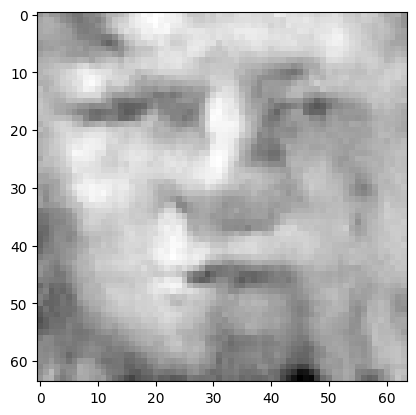

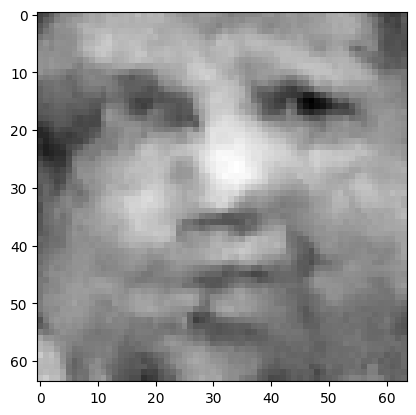

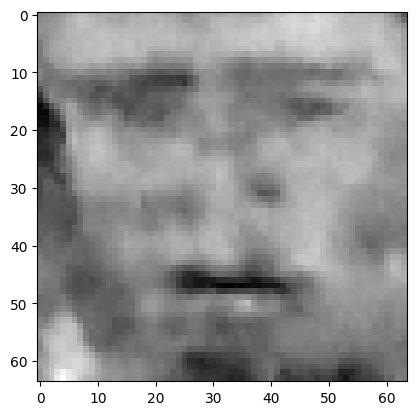

Epoch 22 : 


100%|██████████| 50/50 [00:04<00:00, 10.96it/s]


loss 0.11991585816241646
Epoch 23 : 


100%|██████████| 50/50 [00:04<00:00, 12.26it/s]


loss 0.12393318058481329
Epoch 24 : 


100%|██████████| 50/50 [00:03<00:00, 13.02it/s]


loss 0.11657407255919155
Epoch 25 : 


100%|██████████| 50/50 [00:03<00:00, 13.00it/s]


loss 0.15587315963195966
Epoch 26 : 


100%|██████████| 50/50 [00:04<00:00, 10.97it/s]


loss 0.12005266339097814
Epoch 27 : 


100%|██████████| 50/50 [00:03<00:00, 15.07it/s]


loss 0.0875373027752265
Epoch 28 : 


100%|██████████| 50/50 [00:04<00:00, 11.43it/s]


loss 0.13147120790348166
Epoch 29 : 


100%|██████████| 50/50 [00:03<00:00, 13.12it/s]


loss 0.11309247116694027
Epoch 30 : 


100%|██████████| 50/50 [00:04<00:00, 10.99it/s]


loss 0.139684221492908
Epoch 31 : 


100%|██████████| 50/50 [00:03<00:00, 13.18it/s]


loss 0.14316616510580946
Epoch 32 : 


100%|██████████| 50/50 [00:03<00:00, 13.10it/s]


loss 0.12968923599531162
Epoch 33 : 


100%|██████████| 50/50 [00:04<00:00, 10.89it/s]


loss 0.10271549716639476
Epoch 34 : 


100%|██████████| 50/50 [00:04<00:00, 11.74it/s]


loss 0.10600786838232185
Epoch 35 : 


100%|██████████| 50/50 [00:04<00:00, 11.08it/s]


loss 0.10928965481241655
Epoch 36 : 


100%|██████████| 50/50 [00:03<00:00, 13.77it/s]


loss 0.11529770614808159
Epoch 37 : 


100%|██████████| 50/50 [00:04<00:00, 12.09it/s]


loss 0.14913599473698227
Epoch 38 : 


100%|██████████| 50/50 [00:04<00:00, 12.21it/s]


loss 0.08861638139763338
Epoch 39 : 


100%|██████████| 50/50 [00:02<00:00, 17.63it/s]


loss 0.1254022482912268
Epoch 40 : 


100%|██████████| 50/50 [00:04<00:00, 10.82it/s]


loss 0.16578684479434205
Epoch 41 : 


100%|██████████| 50/50 [00:03<00:00, 12.84it/s]


loss 0.10914056353883642
torch.Size([3, 1, 64, 64])


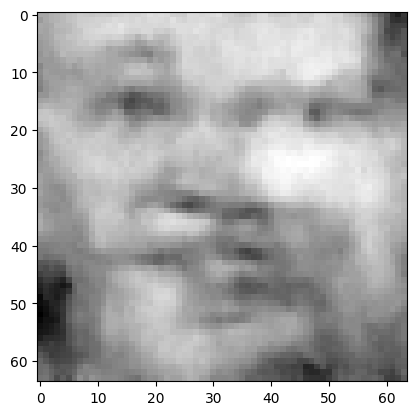

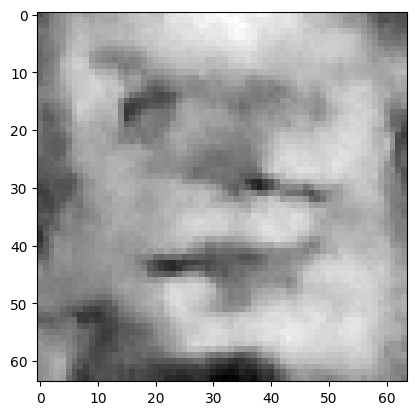

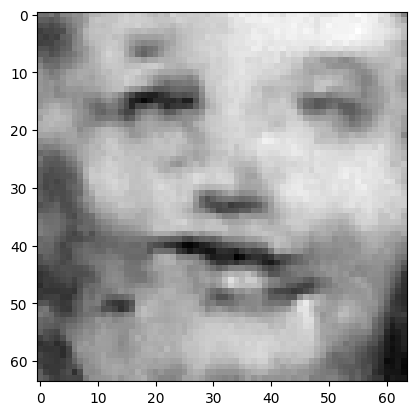

Epoch 42 : 


100%|██████████| 50/50 [00:03<00:00, 12.97it/s]


loss 0.1400873848581612
Epoch 43 : 


100%|██████████| 50/50 [00:04<00:00, 11.78it/s]


loss 0.13298919094347328
Epoch 44 : 


100%|██████████| 50/50 [00:04<00:00, 12.37it/s]


loss 0.13081746100189875
Epoch 45 : 


100%|██████████| 50/50 [00:04<00:00, 11.54it/s]


loss 0.10674363497625539
Epoch 46 : 


100%|██████████| 50/50 [00:03<00:00, 14.17it/s]


loss 0.12827515578495036
Epoch 47 : 


100%|██████████| 50/50 [00:03<00:00, 12.81it/s]


loss 0.1210479131757557
Epoch 48 : 


100%|██████████| 50/50 [00:04<00:00, 11.56it/s]


loss 0.12371394075228948
Epoch 49 : 


100%|██████████| 50/50 [00:04<00:00, 12.02it/s]


loss 0.14298787659994142
Epoch 50 : 


100%|██████████| 50/50 [00:04<00:00, 11.86it/s]


loss 0.1200790974766273
Epoch 51 : 


100%|██████████| 50/50 [00:04<00:00, 11.47it/s]


loss 0.11586525021213688
Epoch 52 : 


100%|██████████| 50/50 [00:03<00:00, 13.12it/s]


loss 0.09617997256417371
Epoch 53 : 


100%|██████████| 50/50 [00:03<00:00, 12.82it/s]


loss 0.09600548163992532
Epoch 54 : 


100%|██████████| 50/50 [00:03<00:00, 13.23it/s]


loss 0.1185028606948346
Epoch 55 : 


100%|██████████| 50/50 [00:04<00:00, 12.44it/s]


loss 0.09479326278018907
Epoch 56 : 


100%|██████████| 50/50 [00:04<00:00, 11.22it/s]


loss 0.10419027914731922
Epoch 57 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.12946507282017816
Epoch 58 : 


100%|██████████| 50/50 [00:04<00:00, 11.71it/s]


loss 0.12987996927727063
Epoch 59 : 


100%|██████████| 50/50 [00:04<00:00, 11.08it/s]


loss 0.16195017283973975
Epoch 60 : 


100%|██████████| 50/50 [00:03<00:00, 14.16it/s]


loss 0.14058022302790524
Epoch 61 : 


100%|██████████| 50/50 [00:04<00:00, 11.34it/s]


loss 0.12786990562794248
torch.Size([3, 1, 64, 64])


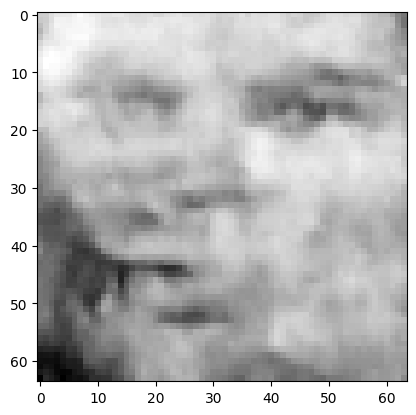

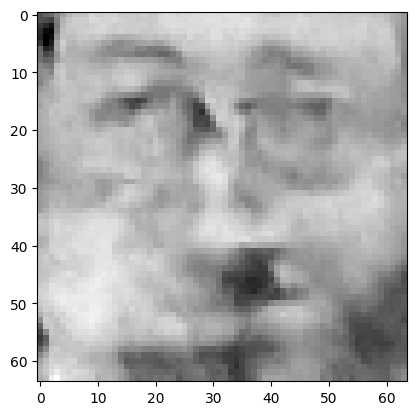

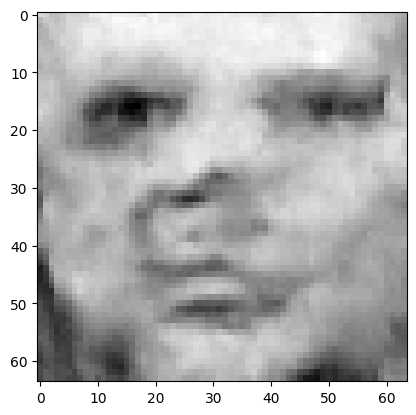

Epoch 62 : 


100%|██████████| 50/50 [00:03<00:00, 12.59it/s]


loss 0.12714431738190285
Epoch 63 : 


100%|██████████| 50/50 [00:03<00:00, 12.75it/s]


loss 0.10051982088781806
Epoch 64 : 


100%|██████████| 50/50 [00:04<00:00, 12.16it/s]


loss 0.1387824880148638
Epoch 65 : 


100%|██████████| 50/50 [00:04<00:00, 12.46it/s]


loss 0.15454119973734556
Epoch 66 : 


100%|██████████| 50/50 [00:04<00:00, 10.99it/s]


loss 0.11641838488729234
Epoch 67 : 


100%|██████████| 50/50 [00:04<00:00, 12.05it/s]


loss 0.0966861783921436
Epoch 68 : 


100%|██████████| 50/50 [00:03<00:00, 12.70it/s]


loss 0.13166859746952214
Epoch 69 : 


100%|██████████| 50/50 [00:03<00:00, 14.37it/s]


loss 0.10337928602738301
Epoch 70 : 


100%|██████████| 50/50 [00:04<00:00, 10.78it/s]


loss 0.15399178224858937
Epoch 71 : 


100%|██████████| 50/50 [00:04<00:00, 12.35it/s]


loss 0.15908802737611666
Epoch 72 : 


100%|██████████| 50/50 [00:04<00:00, 12.18it/s]


loss 0.11195173485720429
Epoch 73 : 


100%|██████████| 50/50 [00:04<00:00, 10.79it/s]


loss 0.1423948555541636
Epoch 74 : 


100%|██████████| 50/50 [00:04<00:00, 12.11it/s]


loss 0.1308685173345493
Epoch 75 : 


100%|██████████| 50/50 [00:04<00:00, 11.45it/s]


loss 0.10278165280105285
Epoch 76 : 


100%|██████████| 50/50 [00:04<00:00, 12.27it/s]


loss 0.13378098722509824
Epoch 77 : 


100%|██████████| 50/50 [00:03<00:00, 14.68it/s]


loss 0.12482944962375982
Epoch 78 : 


100%|██████████| 50/50 [00:04<00:00, 11.73it/s]


loss 0.14315968998051684
Epoch 79 : 


100%|██████████| 50/50 [00:03<00:00, 13.05it/s]


loss 0.10335526982192754
Epoch 80 : 


100%|██████████| 50/50 [00:04<00:00, 11.01it/s]


loss 0.07930938924708485
Epoch 81 : 


100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


loss 0.0963442706590221
torch.Size([3, 1, 64, 64])


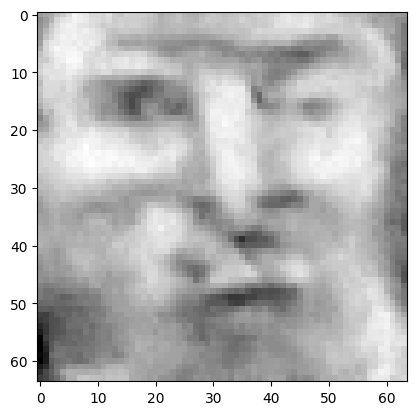

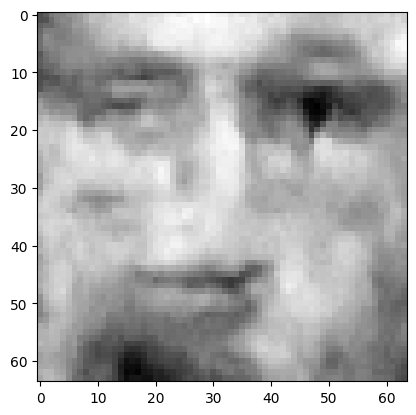

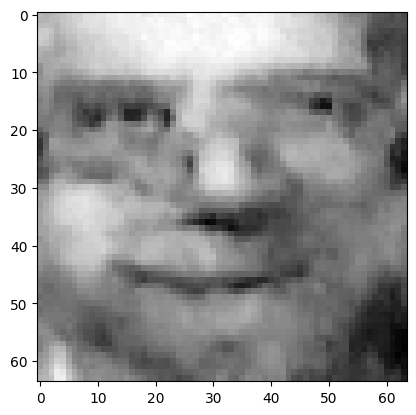

Epoch 82 : 


100%|██████████| 50/50 [00:04<00:00, 10.95it/s]


loss 0.09888299664238497
Epoch 83 : 


100%|██████████| 50/50 [00:04<00:00, 11.80it/s]


loss 0.12588758755568744
Epoch 84 : 


100%|██████████| 50/50 [00:04<00:00, 11.50it/s]


loss 0.12728725320958115
Epoch 85 : 


100%|██████████| 50/50 [00:04<00:00, 11.49it/s]


loss 0.10207604007622807
Epoch 86 : 


100%|██████████| 50/50 [00:05<00:00,  9.67it/s]


loss 0.11617603778925395
Epoch 87 : 


100%|██████████| 50/50 [00:03<00:00, 12.57it/s]


loss 0.13084135707947225
Epoch 88 : 


100%|██████████| 50/50 [00:03<00:00, 12.64it/s]


loss 0.12533058403701838
Epoch 89 : 


100%|██████████| 50/50 [00:03<00:00, 12.52it/s]


loss 0.11911307175247396
Epoch 90 : 


100%|██████████| 50/50 [00:03<00:00, 13.14it/s]


loss 0.1204028438545475
Epoch 91 : 


100%|██████████| 50/50 [00:04<00:00, 11.00it/s]


loss 0.12497429686308717
Epoch 92 : 


100%|██████████| 50/50 [00:04<00:00, 10.65it/s]


loss 0.11785919808391437
Epoch 93 : 


100%|██████████| 50/50 [00:04<00:00, 11.34it/s]


loss 0.11101986395063224
Epoch 94 : 


100%|██████████| 50/50 [00:04<00:00, 11.74it/s]


loss 0.12868488961549943
Epoch 95 : 


100%|██████████| 50/50 [00:04<00:00, 10.10it/s]


loss 0.10546539063702587
Epoch 96 : 


100%|██████████| 50/50 [00:03<00:00, 12.68it/s]


loss 0.09915789473981178
Epoch 97 : 


100%|██████████| 50/50 [00:04<00:00, 10.64it/s]


loss 0.09639031089257845
Epoch 98 : 


100%|██████████| 50/50 [00:04<00:00, 11.28it/s]


loss 0.14336225471167857
Epoch 99 : 


100%|██████████| 50/50 [00:04<00:00, 12.34it/s]


loss 0.10846102922987955


In [7]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:03<00:00, 12.77it/s]


loss 0.14830149451166613
Epoch 1 : 


100%|██████████| 50/50 [00:04<00:00, 10.25it/s]


loss 0.1128948368613708
torch.Size([3, 1, 64, 64])


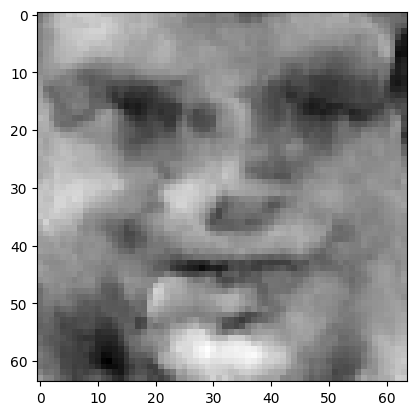

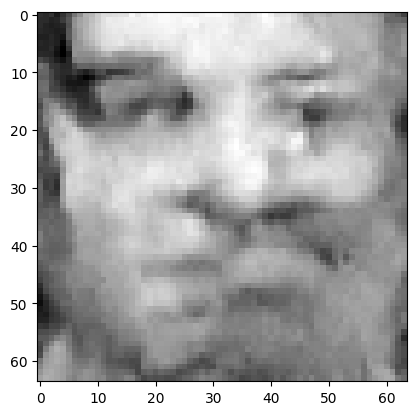

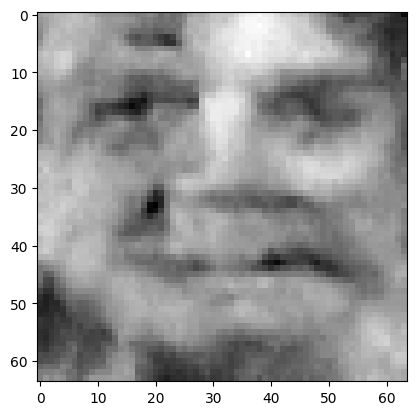

Epoch 2 : 


100%|██████████| 50/50 [00:04<00:00, 10.35it/s]


loss 0.09155898958015157
Epoch 3 : 


100%|██████████| 50/50 [00:04<00:00, 10.72it/s]


loss 0.1149587156255371
Epoch 4 : 


100%|██████████| 50/50 [00:04<00:00, 11.99it/s]


loss 0.14371715343366256
Epoch 5 : 


100%|██████████| 50/50 [00:04<00:00, 11.57it/s]


loss 0.12084782143522275
Epoch 6 : 


100%|██████████| 50/50 [00:04<00:00, 10.57it/s]


loss 0.11746443060521478
Epoch 7 : 


100%|██████████| 50/50 [00:03<00:00, 12.94it/s]


loss 0.11385188696784235
Epoch 8 : 


100%|██████████| 50/50 [00:04<00:00, 10.56it/s]


loss 0.12189810232293742
Epoch 9 : 


100%|██████████| 50/50 [00:04<00:00, 11.07it/s]


loss 0.1052427730560419
Epoch 10 : 


100%|██████████| 50/50 [00:04<00:00, 11.28it/s]


loss 0.13098115351931316
Epoch 11 : 


100%|██████████| 50/50 [00:03<00:00, 12.87it/s]


loss 0.12177457688752513
Epoch 12 : 


100%|██████████| 50/50 [00:05<00:00,  9.85it/s]


loss 0.10214534935153786
Epoch 13 : 


100%|██████████| 50/50 [00:04<00:00, 11.04it/s]


loss 0.1032772548380051
Epoch 14 : 


100%|██████████| 50/50 [00:03<00:00, 13.65it/s]


loss 0.1299582898930343
Epoch 15 : 


100%|██████████| 50/50 [00:04<00:00, 12.23it/s]


loss 0.1138016963669738
Epoch 16 : 


100%|██████████| 50/50 [00:04<00:00, 10.44it/s]


loss 0.13553953978695413
Epoch 17 : 


100%|██████████| 50/50 [00:03<00:00, 13.87it/s]


loss 0.11678616337576968
Epoch 18 : 


100%|██████████| 50/50 [00:04<00:00, 11.89it/s]


loss 0.1569812054165179
Epoch 19 : 


100%|██████████| 50/50 [00:05<00:00,  9.32it/s]


loss 0.11571666553551255
Epoch 20 : 


100%|██████████| 50/50 [00:04<00:00, 11.94it/s]


loss 0.11736645523601391
Epoch 21 : 


100%|██████████| 50/50 [00:04<00:00, 11.21it/s]


loss 0.10630619786829505
torch.Size([3, 1, 64, 64])


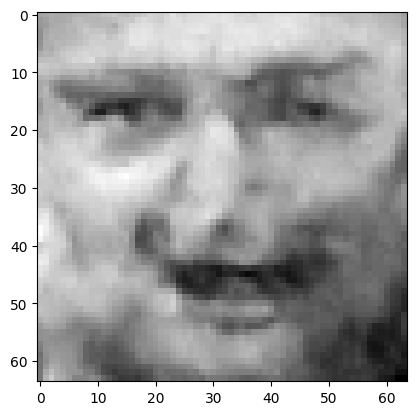

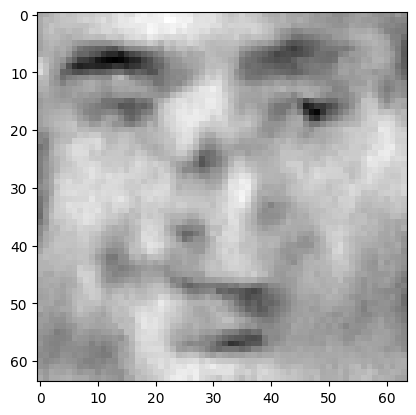

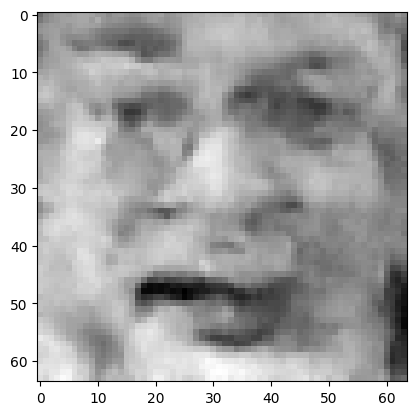

Epoch 22 : 


100%|██████████| 50/50 [00:03<00:00, 12.66it/s]


loss 0.10908564416199105
Epoch 23 : 


100%|██████████| 50/50 [00:04<00:00, 10.87it/s]


loss 0.12763647069383444
Epoch 24 : 


100%|██████████| 50/50 [00:04<00:00, 10.73it/s]


loss 0.1379387120591475
Epoch 25 : 


100%|██████████| 50/50 [00:03<00:00, 13.71it/s]


loss 0.11608574991184362
Epoch 26 : 


100%|██████████| 50/50 [00:04<00:00, 11.85it/s]


loss 0.11308032572430698
Epoch 27 : 


100%|██████████| 50/50 [00:04<00:00, 10.56it/s]


loss 0.10911359290083021
Epoch 28 : 


100%|██████████| 50/50 [00:04<00:00, 12.04it/s]


loss 0.12204622307502688
Epoch 29 : 


100%|██████████| 50/50 [00:04<00:00, 10.30it/s]


loss 0.10990843800468132
Epoch 30 : 


100%|██████████| 50/50 [00:04<00:00, 11.27it/s]


loss 0.10428294719536918
Epoch 31 : 


100%|██████████| 50/50 [00:04<00:00, 11.60it/s]


loss 0.08809465003102018
Epoch 32 : 


100%|██████████| 50/50 [00:04<00:00, 12.46it/s]


loss 0.0854607178693456
Epoch 33 : 


100%|██████████| 50/50 [00:04<00:00, 10.59it/s]


loss 0.08660371105805399
Epoch 34 : 


100%|██████████| 50/50 [00:04<00:00, 12.00it/s]


loss 0.12516867890913952
Epoch 35 : 


100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


loss 0.0941542103277606
Epoch 36 : 


100%|██████████| 50/50 [00:04<00:00, 10.52it/s]


loss 0.10346824747923379
Epoch 37 : 


100%|██████████| 50/50 [00:04<00:00, 12.14it/s]


loss 0.09913991737186052
Epoch 38 : 


100%|██████████| 50/50 [00:04<00:00, 10.69it/s]


loss 0.13217209469344385
Epoch 39 : 


100%|██████████| 50/50 [00:04<00:00, 12.19it/s]


loss 0.1335781694137934
Epoch 40 : 


100%|██████████| 50/50 [00:04<00:00, 11.26it/s]


loss 0.11535861604073706
Epoch 41 : 


100%|██████████| 50/50 [00:03<00:00, 13.16it/s]


loss 0.10058214332087509
torch.Size([3, 1, 64, 64])


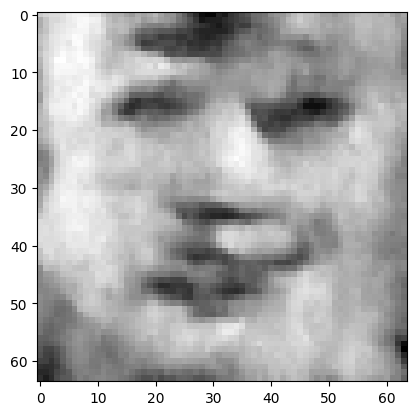

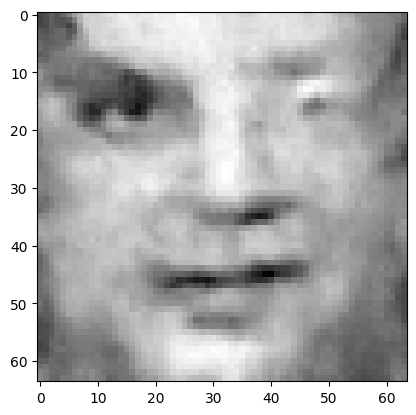

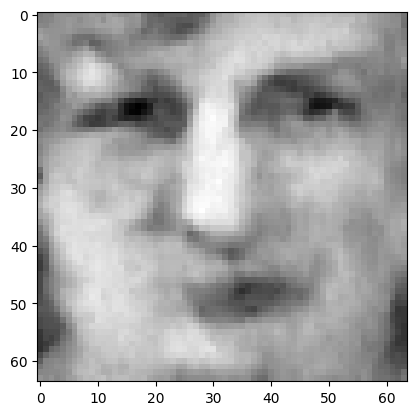

Epoch 42 : 


100%|██████████| 50/50 [00:04<00:00, 10.12it/s]


loss 0.12292009754095261
Epoch 43 : 


100%|██████████| 50/50 [00:04<00:00, 12.20it/s]


loss 0.11065566882000664
Epoch 44 : 


100%|██████████| 50/50 [00:04<00:00, 10.30it/s]


loss 0.11812686528549414
Epoch 45 : 


100%|██████████| 50/50 [00:04<00:00, 11.25it/s]


loss 0.10439091951602389
Epoch 46 : 


100%|██████████| 50/50 [00:04<00:00, 11.32it/s]


loss 0.12746782320413802
Epoch 47 : 


100%|██████████| 50/50 [00:04<00:00, 10.81it/s]


loss 0.13660997294566046
Epoch 48 : 


100%|██████████| 50/50 [00:04<00:00, 10.91it/s]


loss 0.1098270177693553
Epoch 49 : 


100%|██████████| 50/50 [00:04<00:00, 11.57it/s]


loss 0.10983541924644008
Epoch 50 : 


100%|██████████| 50/50 [00:04<00:00, 10.86it/s]


loss 0.09510289851795414
Epoch 51 : 


100%|██████████| 50/50 [00:03<00:00, 15.56it/s]


loss 0.08991965752895434
Epoch 52 : 


100%|██████████| 50/50 [00:03<00:00, 12.74it/s]


loss 0.11052242358965933
Epoch 53 : 


100%|██████████| 50/50 [00:04<00:00, 10.86it/s]


loss 0.1056761152145759
Epoch 54 : 


100%|██████████| 50/50 [00:04<00:00, 12.11it/s]


loss 0.09665139491042661
Epoch 55 : 


100%|██████████| 50/50 [00:03<00:00, 13.10it/s]


loss 0.10930753136122967
Epoch 56 : 


100%|██████████| 50/50 [00:04<00:00, 10.59it/s]


loss 0.13751571038249827
Epoch 57 : 


100%|██████████| 50/50 [00:04<00:00, 11.10it/s]


loss 0.12772599843028365
Epoch 58 : 


100%|██████████| 50/50 [00:04<00:00, 10.65it/s]


loss 0.10732151837557784
Epoch 59 : 


100%|██████████| 50/50 [00:04<00:00, 12.26it/s]


loss 0.09497369626840502
Epoch 60 : 


100%|██████████| 50/50 [00:04<00:00, 10.22it/s]


loss 0.12672755367919025
Epoch 61 : 


100%|██████████| 50/50 [00:03<00:00, 12.58it/s]


loss 0.09326573178414387
torch.Size([3, 1, 64, 64])


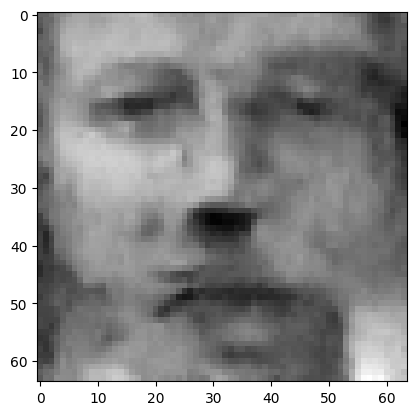

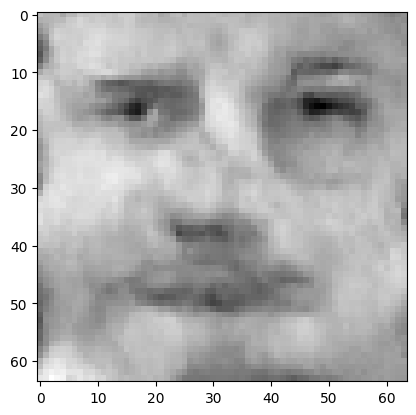

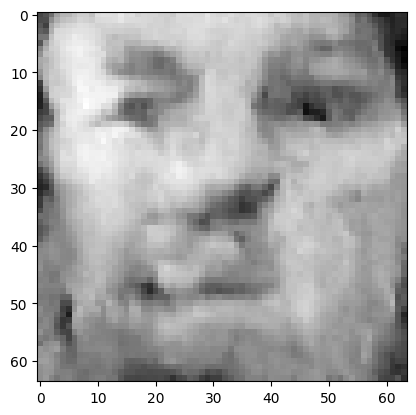

Epoch 62 : 


100%|██████████| 50/50 [00:03<00:00, 13.84it/s]


loss 0.12927583841249563
Epoch 63 : 


100%|██████████| 50/50 [00:04<00:00, 12.46it/s]


loss 0.07986978769841305
Epoch 64 : 


100%|██████████| 50/50 [00:04<00:00, 11.51it/s]


loss 0.14062974653041535
Epoch 65 : 


100%|██████████| 50/50 [00:04<00:00, 11.86it/s]


loss 0.11836721606016927
Epoch 66 : 


100%|██████████| 50/50 [00:05<00:00,  9.75it/s]


loss 0.12537598041433642
Epoch 67 : 


100%|██████████| 50/50 [00:04<00:00, 12.06it/s]


loss 0.10593411336818954
Epoch 68 : 


100%|██████████| 50/50 [00:04<00:00, 11.38it/s]


loss 0.09442748923411722
Epoch 69 : 


100%|██████████| 50/50 [00:04<00:00, 11.98it/s]


loss 0.12334289681631387
Epoch 70 : 


100%|██████████| 50/50 [00:04<00:00, 10.89it/s]


loss 0.12265709781587618
Epoch 71 : 


100%|██████████| 50/50 [00:03<00:00, 12.56it/s]


loss 0.1254523975264783
Epoch 72 : 


100%|██████████| 50/50 [00:04<00:00, 11.11it/s]


loss 0.11897027340158176
Epoch 73 : 


100%|██████████| 50/50 [00:04<00:00, 10.27it/s]


loss 0.09919883916874836
Epoch 74 : 


100%|██████████| 50/50 [00:03<00:00, 13.15it/s]


loss 0.1045255605880332
Epoch 75 : 


100%|██████████| 50/50 [00:04<00:00, 10.43it/s]


loss 0.1044898859772423
Epoch 76 : 


100%|██████████| 50/50 [00:04<00:00, 11.81it/s]


loss 0.11141340109535534
Epoch 77 : 


100%|██████████| 50/50 [00:04<00:00, 11.60it/s]


loss 0.10678540338790452
Epoch 78 : 


100%|██████████| 50/50 [00:04<00:00, 11.35it/s]


loss 0.12088242010247875
Epoch 79 : 


100%|██████████| 50/50 [00:04<00:00, 10.54it/s]


loss 0.11112932559840043
Epoch 80 : 


100%|██████████| 50/50 [00:03<00:00, 13.33it/s]


loss 0.12320227196371247
Epoch 81 : 


100%|██████████| 50/50 [00:03<00:00, 13.15it/s]


loss 0.09014366961447912
torch.Size([3, 1, 64, 64])


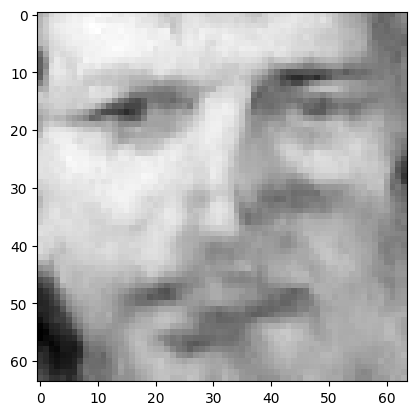

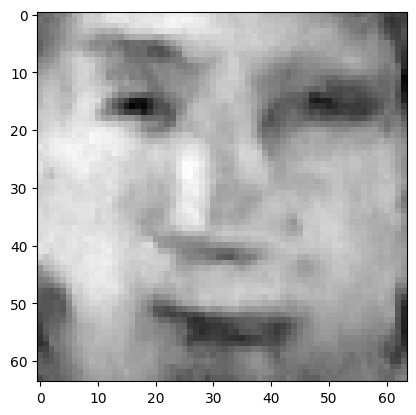

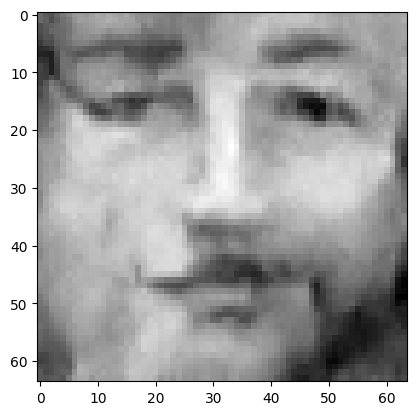

Epoch 82 : 


100%|██████████| 50/50 [00:03<00:00, 13.26it/s]


loss 0.11738479313704879
Epoch 83 : 


100%|██████████| 50/50 [00:04<00:00, 11.26it/s]


loss 0.07632820745861116
Epoch 84 : 


100%|██████████| 50/50 [00:04<00:00, 11.52it/s]


loss 0.14396430459005427
Epoch 85 : 


100%|██████████| 50/50 [00:04<00:00, 10.36it/s]


loss 0.12173525815395159
Epoch 86 : 


100%|██████████| 50/50 [00:03<00:00, 13.06it/s]


loss 0.10543524332470791
Epoch 87 : 


100%|██████████| 50/50 [00:04<00:00, 10.30it/s]


loss 0.10935322745978136
Epoch 88 : 


100%|██████████| 50/50 [00:03<00:00, 12.89it/s]


loss 0.12517408966203344
Epoch 89 : 


100%|██████████| 50/50 [00:04<00:00, 10.31it/s]


loss 0.1127873683186342
Epoch 90 : 


100%|██████████| 50/50 [00:04<00:00, 10.92it/s]


loss 0.16617986199052626
Epoch 91 : 


100%|██████████| 50/50 [00:04<00:00, 12.17it/s]


loss 0.13296819265024215
Epoch 92 : 


100%|██████████| 50/50 [00:05<00:00,  9.88it/s]


loss 0.10462766575964558
Epoch 93 : 


100%|██████████| 50/50 [00:04<00:00, 10.63it/s]


loss 0.09638647954087005
Epoch 94 : 


100%|██████████| 50/50 [00:04<00:00, 10.31it/s]


loss 0.09626244799813931
Epoch 95 : 


100%|██████████| 50/50 [00:04<00:00, 12.34it/s]


loss 0.10363381603713413
Epoch 96 : 


100%|██████████| 50/50 [00:04<00:00, 10.13it/s]


loss 0.13228861391304989
Epoch 97 : 


100%|██████████| 50/50 [00:04<00:00, 11.71it/s]


loss 0.11774517284786742
Epoch 98 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.09676845657266996
Epoch 99 : 


100%|██████████| 50/50 [00:04<00:00, 10.55it/s]


loss 0.09297931251596217
Epoch 100 : 


100%|██████████| 50/50 [00:03<00:00, 12.84it/s]


loss 0.12367929500887159
Epoch 101 : 


100%|██████████| 50/50 [00:04<00:00, 10.06it/s]


loss 0.11060855073021959
torch.Size([3, 1, 64, 64])


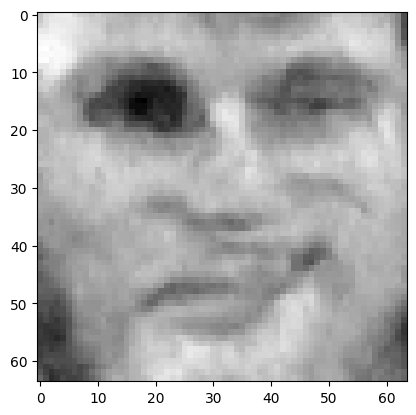

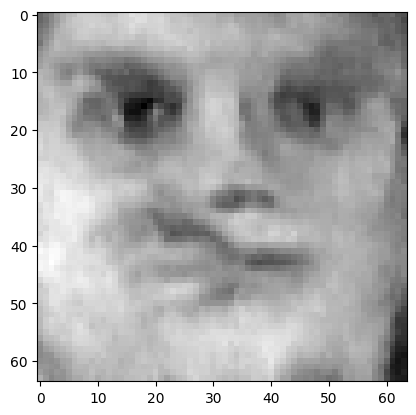

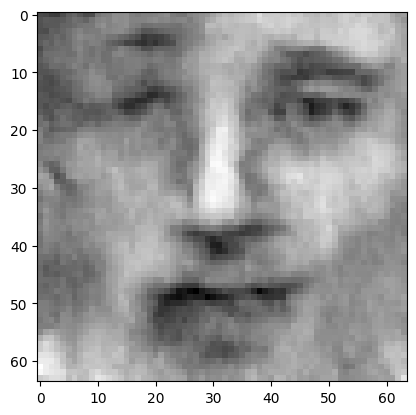

Epoch 102 : 


100%|██████████| 50/50 [00:04<00:00, 11.56it/s]


loss 0.11063265504540427
Epoch 103 : 


100%|██████████| 50/50 [00:04<00:00, 10.68it/s]


loss 0.11258317307924032
Epoch 104 : 


100%|██████████| 50/50 [00:03<00:00, 12.64it/s]


loss 0.10879442556829104
Epoch 105 : 


100%|██████████| 50/50 [00:04<00:00, 10.27it/s]


loss 0.10687641408633708
Epoch 106 : 


100%|██████████| 50/50 [00:03<00:00, 12.94it/s]


loss 0.13993528419111811
Epoch 107 : 


100%|██████████| 50/50 [00:04<00:00, 12.13it/s]


loss 0.09225282458718043
Epoch 108 : 


100%|██████████| 50/50 [00:04<00:00, 11.92it/s]


loss 0.12806856333195069
Epoch 109 : 


100%|██████████| 50/50 [00:04<00:00, 10.16it/s]


loss 0.09663451022550137
Epoch 110 : 


100%|██████████| 50/50 [00:03<00:00, 13.48it/s]


loss 0.09722900414655195
Epoch 111 : 


100%|██████████| 50/50 [00:04<00:00, 11.79it/s]


loss 0.09967715560070954
Epoch 112 : 


100%|██████████| 50/50 [00:04<00:00, 11.49it/s]


loss 0.0857622811306986
Epoch 113 : 


100%|██████████| 50/50 [00:03<00:00, 12.82it/s]


loss 0.11684978008350476
Epoch 114 : 


100%|██████████| 50/50 [00:04<00:00, 11.90it/s]


loss 0.10247996828949736
Epoch 115 : 


100%|██████████| 50/50 [00:04<00:00, 11.77it/s]


loss 0.09606853775728331
Epoch 116 : 


100%|██████████| 50/50 [00:04<00:00, 12.15it/s]


loss 0.08657672167502345
Epoch 117 : 


100%|██████████| 50/50 [00:03<00:00, 12.75it/s]


loss 0.11964196882293546
Epoch 118 : 


100%|██████████| 50/50 [00:04<00:00, 12.44it/s]


loss 0.10188725643294405
Epoch 119 : 


100%|██████████| 50/50 [00:04<00:00, 11.31it/s]


loss 0.1086967279119094
Epoch 120 : 


100%|██████████| 50/50 [00:04<00:00, 11.31it/s]


loss 0.10892957548977458
Epoch 121 : 


100%|██████████| 50/50 [00:04<00:00, 11.80it/s]


loss 0.09011177789904319
torch.Size([3, 1, 64, 64])


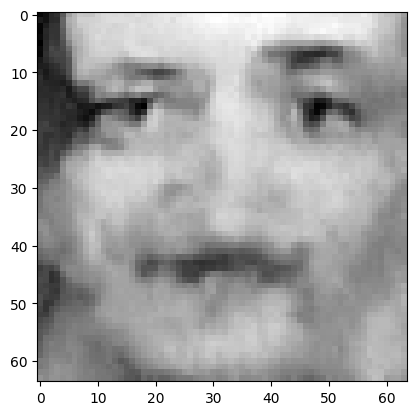

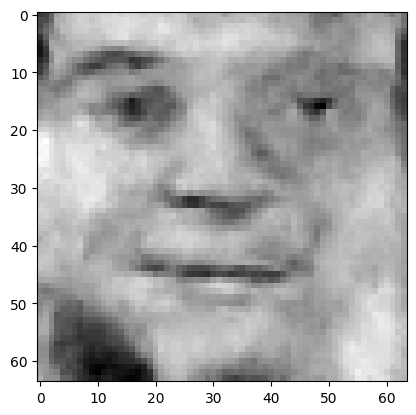

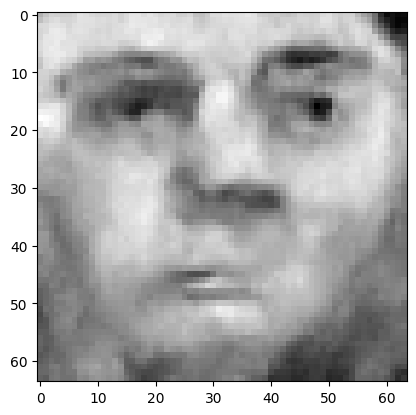

Epoch 122 : 


100%|██████████| 50/50 [00:04<00:00, 11.62it/s]


loss 0.10815689397966079
Epoch 123 : 


100%|██████████| 50/50 [00:04<00:00, 10.75it/s]


loss 0.13277169380246764
Epoch 124 : 


100%|██████████| 50/50 [00:04<00:00, 12.09it/s]


loss 0.10532947003298711
Epoch 125 : 


100%|██████████| 50/50 [00:03<00:00, 13.84it/s]


loss 0.09675726018563868
Epoch 126 : 


100%|██████████| 50/50 [00:03<00:00, 13.99it/s]


loss 0.10243364521405769
Epoch 127 : 


100%|██████████| 50/50 [00:04<00:00, 10.86it/s]


loss 0.12468937722242977
Epoch 128 : 


100%|██████████| 50/50 [00:04<00:00, 12.21it/s]


loss 0.11676383012776513
Epoch 129 : 


100%|██████████| 50/50 [00:04<00:00, 10.67it/s]


loss 0.10029716386658061
Epoch 130 : 


100%|██████████| 50/50 [00:04<00:00, 11.19it/s]


loss 0.10134700642228718
Epoch 131 : 


100%|██████████| 50/50 [00:04<00:00, 12.47it/s]


loss 0.06606330618463543
Epoch 132 : 


100%|██████████| 50/50 [00:04<00:00, 10.99it/s]


loss 0.09615776185444792
Epoch 133 : 


100%|██████████| 50/50 [00:04<00:00, 12.17it/s]


loss 0.1068380640309753
Epoch 134 : 


100%|██████████| 50/50 [00:04<00:00, 10.49it/s]


loss 0.10053047826033219
Epoch 135 : 


100%|██████████| 50/50 [00:04<00:00, 11.31it/s]


loss 0.13161004872089993
Epoch 136 : 


100%|██████████| 50/50 [00:03<00:00, 13.07it/s]


loss 0.12002979461579533
Epoch 137 : 


100%|██████████| 50/50 [00:04<00:00, 11.56it/s]


loss 0.09522722274907744
Epoch 138 : 


100%|██████████| 50/50 [00:04<00:00, 10.71it/s]


loss 0.14583306208984192
Epoch 139 : 


100%|██████████| 50/50 [00:04<00:00, 11.71it/s]


loss 0.1320419673378631
Epoch 140 : 


100%|██████████| 50/50 [00:04<00:00, 11.40it/s]


loss 0.11150120011603619
Epoch 141 : 


100%|██████████| 50/50 [00:04<00:00, 10.91it/s]


loss 0.08182772055956264
torch.Size([3, 1, 64, 64])


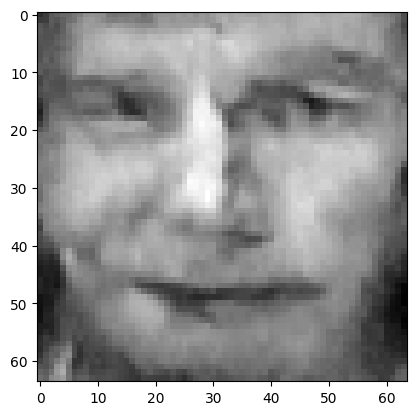

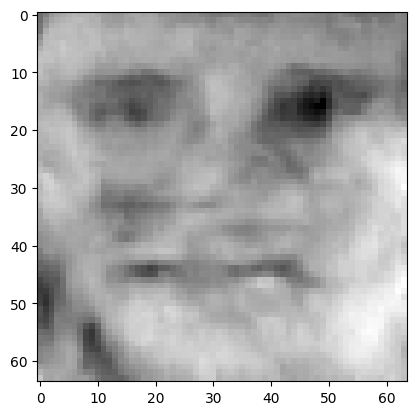

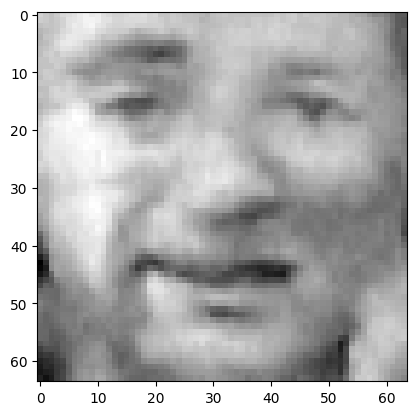

Epoch 142 : 


100%|██████████| 50/50 [00:04<00:00, 11.26it/s]


loss 0.08895930648071917
Epoch 143 : 


100%|██████████| 50/50 [00:04<00:00, 11.62it/s]


loss 0.1268261782278786
Epoch 144 : 


100%|██████████| 50/50 [00:03<00:00, 13.53it/s]


loss 0.14537915481655414
Epoch 145 : 


100%|██████████| 50/50 [00:04<00:00, 10.45it/s]


loss 0.08939078472967472
Epoch 146 : 


100%|██████████| 50/50 [00:04<00:00, 11.34it/s]


loss 0.11260991064536229
Epoch 147 : 


100%|██████████| 50/50 [00:04<00:00, 11.68it/s]


loss 0.11450853006024904
Epoch 148 : 


100%|██████████| 50/50 [00:04<00:00, 12.01it/s]


loss 0.09367404849714253
Epoch 149 : 


100%|██████████| 50/50 [00:05<00:00,  9.45it/s]


loss 0.09550570082865513
Epoch 150 : 


100%|██████████| 50/50 [00:04<00:00, 12.40it/s]


loss 0.10535791230318771
Epoch 151 : 


100%|██████████| 50/50 [00:04<00:00, 11.25it/s]


loss 0.12695820482895537
Epoch 152 : 


100%|██████████| 50/50 [00:04<00:00, 10.94it/s]


loss 0.12831417287619093
Epoch 153 : 


100%|██████████| 50/50 [00:04<00:00, 10.40it/s]


loss 0.18971916959459434
Epoch 154 : 


100%|██████████| 50/50 [00:03<00:00, 15.35it/s]


loss 0.12307707478842232
Epoch 155 : 


100%|██████████| 50/50 [00:03<00:00, 13.00it/s]


loss 0.0909215856846289
Epoch 156 : 


100%|██████████| 50/50 [00:04<00:00, 11.36it/s]


loss 0.14424645715431075
Epoch 157 : 


100%|██████████| 50/50 [00:05<00:00,  9.64it/s]


loss 0.1041945860100743
Epoch 158 : 


100%|██████████| 50/50 [00:04<00:00, 11.15it/s]


loss 0.10079206822103226
Epoch 159 : 


100%|██████████| 50/50 [00:04<00:00, 10.88it/s]


loss 0.13729300980918424
Epoch 160 : 


100%|██████████| 50/50 [00:04<00:00, 12.05it/s]


loss 0.11466304744170813
Epoch 161 : 


100%|██████████| 50/50 [00:04<00:00, 10.86it/s]


loss 0.07894357394068982
torch.Size([3, 1, 64, 64])


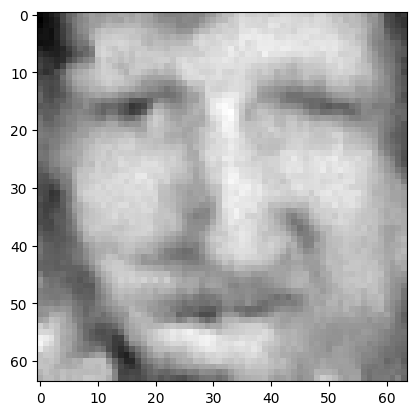

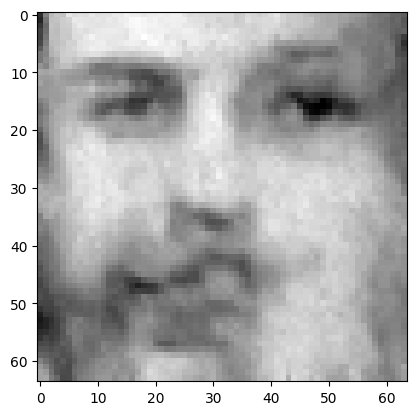

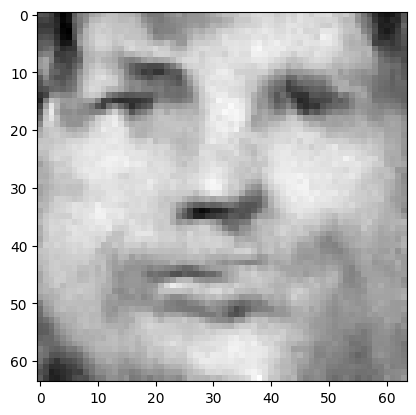

Epoch 162 : 


100%|██████████| 50/50 [00:03<00:00, 16.09it/s]


loss 0.1285128322307903
Epoch 163 : 


100%|██████████| 50/50 [00:04<00:00, 11.35it/s]


loss 0.11835514783720637
Epoch 164 : 


100%|██████████| 50/50 [00:04<00:00, 10.16it/s]


loss 0.09943071930738584
Epoch 165 : 


100%|██████████| 50/50 [00:04<00:00, 11.04it/s]


loss 0.12703471981210027
Epoch 166 : 


100%|██████████| 50/50 [00:05<00:00,  9.85it/s]


loss 0.09219576735781247
Epoch 167 : 


100%|██████████| 50/50 [00:03<00:00, 12.80it/s]


loss 0.1028867795454435
Epoch 168 : 


100%|██████████| 50/50 [00:04<00:00, 10.19it/s]


loss 0.0839094214243089
Epoch 169 : 


100%|██████████| 50/50 [00:03<00:00, 13.29it/s]


loss 0.08715039057730146
Epoch 170 : 


100%|██████████| 50/50 [00:04<00:00, 11.72it/s]


loss 0.07483744116220216
Epoch 171 : 


100%|██████████| 50/50 [00:04<00:00, 10.69it/s]


loss 0.08584988824721078
Epoch 172 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.10003657701531457
Epoch 173 : 


100%|██████████| 50/50 [00:04<00:00, 12.37it/s]


loss 0.10571061970806812
Epoch 174 : 


100%|██████████| 50/50 [00:04<00:00, 10.04it/s]


loss 0.12012700790594447
Epoch 175 : 


100%|██████████| 50/50 [00:04<00:00, 11.50it/s]


loss 0.12393313803181286
Epoch 176 : 


100%|██████████| 50/50 [00:04<00:00, 10.47it/s]


loss 0.11911794585026939
Epoch 177 : 


100%|██████████| 50/50 [00:03<00:00, 12.87it/s]


loss 0.11886720170557252
Epoch 178 : 


100%|██████████| 50/50 [00:04<00:00, 11.31it/s]


loss 0.10719476667611243
Epoch 179 : 


100%|██████████| 50/50 [00:05<00:00,  9.89it/s]


loss 0.08353151747169407
Epoch 180 : 


100%|██████████| 50/50 [00:04<00:00, 12.28it/s]


loss 0.094808775481817
Epoch 181 : 


100%|██████████| 50/50 [00:04<00:00, 10.79it/s]


loss 0.08306087443808419
torch.Size([3, 1, 64, 64])


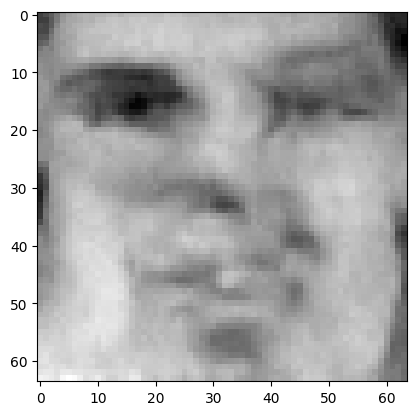

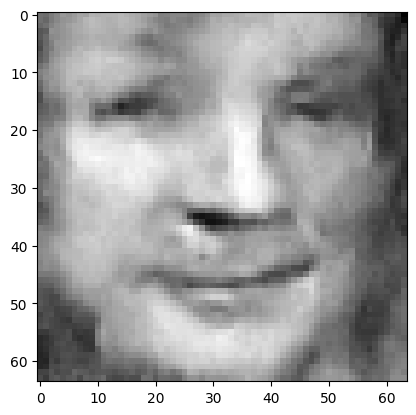

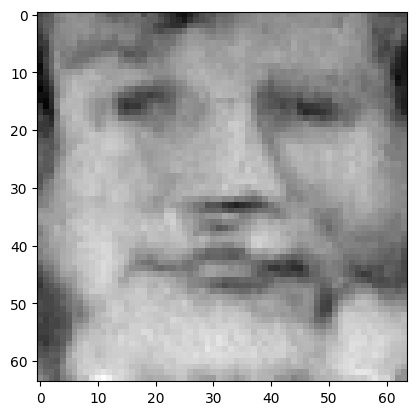

Epoch 182 : 


100%|██████████| 50/50 [00:04<00:00, 11.76it/s]


loss 0.08620316172229078
Epoch 183 : 


100%|██████████| 50/50 [00:04<00:00, 10.17it/s]


loss 0.1493140730474651
Epoch 184 : 


100%|██████████| 50/50 [00:04<00:00, 11.77it/s]


loss 0.07711316588982471
Epoch 185 : 


100%|██████████| 50/50 [00:04<00:00, 11.45it/s]


loss 0.07919517504272597
Epoch 186 : 


100%|██████████| 50/50 [00:05<00:00,  9.85it/s]


loss 0.06539298425402412
Epoch 187 : 


100%|██████████| 50/50 [00:04<00:00, 12.40it/s]


loss 0.0910274036686586
Epoch 188 : 


100%|██████████| 50/50 [00:04<00:00, 10.56it/s]


loss 0.07878243271158275
Epoch 189 : 


100%|██████████| 50/50 [00:04<00:00, 11.29it/s]


loss 0.11566132147080438
Epoch 190 : 


100%|██████████| 50/50 [00:04<00:00, 12.46it/s]


loss 0.13158415999874293
Epoch 191 : 


100%|██████████| 50/50 [00:04<00:00, 10.96it/s]


loss 0.1335004493343155
Epoch 192 : 


100%|██████████| 50/50 [00:04<00:00, 10.60it/s]


loss 0.08892214233710247
Epoch 193 : 


100%|██████████| 50/50 [00:04<00:00, 11.92it/s]


loss 0.12219643162013558
Epoch 194 : 


100%|██████████| 50/50 [00:05<00:00,  9.96it/s]


loss 0.1121253088359056
Epoch 195 : 


100%|██████████| 50/50 [00:04<00:00, 11.47it/s]


loss 0.0742100600199086
Epoch 196 : 


100%|██████████| 50/50 [00:04<00:00, 10.47it/s]


loss 0.09699929655412973
Epoch 197 : 


100%|██████████| 50/50 [00:04<00:00, 11.59it/s]


loss 0.11892293576880718
Epoch 198 : 


100%|██████████| 50/50 [00:03<00:00, 13.69it/s]


loss 0.10629244542171462
Epoch 199 : 


100%|██████████| 50/50 [00:04<00:00, 10.56it/s]


loss 0.133960768599239


In [8]:
train_ddpm(200, 0.0005, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:03<00:00, 15.81it/s]


loss 0.10478004890783466
Epoch 1 : 


100%|██████████| 50/50 [00:04<00:00, 11.36it/s]


loss 0.08367498734885252
torch.Size([3, 1, 64, 64])


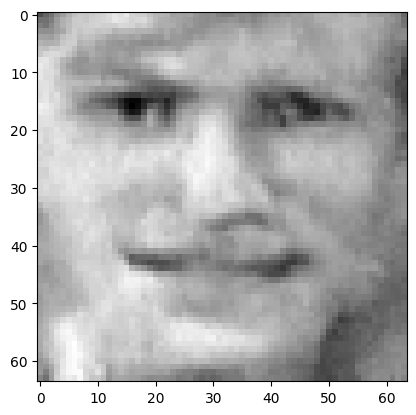

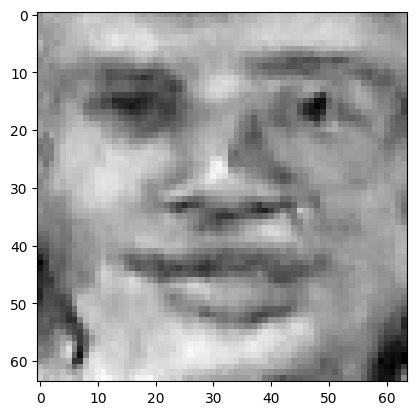

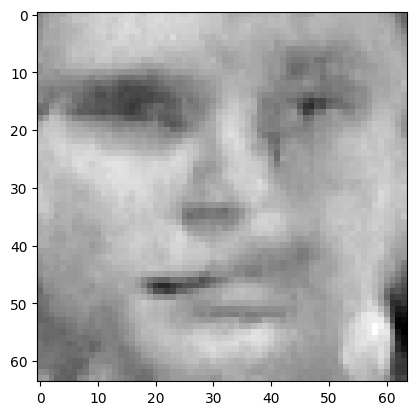

Epoch 2 : 


100%|██████████| 50/50 [00:04<00:00, 10.59it/s]


loss 0.12480373254921323
Epoch 3 : 


100%|██████████| 50/50 [00:04<00:00, 11.53it/s]


loss 0.1051376400656423
Epoch 4 : 


100%|██████████| 50/50 [00:05<00:00,  9.77it/s]


loss 0.13984261989977914
Epoch 5 : 


100%|██████████| 50/50 [00:04<00:00, 11.33it/s]


loss 0.1378024674261885
Epoch 6 : 


100%|██████████| 50/50 [00:04<00:00, 12.42it/s]


loss 0.1314573021076023
Epoch 7 : 


100%|██████████| 50/50 [00:04<00:00, 12.19it/s]


loss 0.09885326858722335
Epoch 8 : 


100%|██████████| 50/50 [00:03<00:00, 13.71it/s]


loss 0.12285962401121496
Epoch 9 : 


100%|██████████| 50/50 [00:04<00:00, 10.41it/s]


loss 0.117347210373568
Epoch 10 : 


100%|██████████| 50/50 [00:04<00:00, 11.41it/s]


loss 0.09313101852073301
Epoch 11 : 


100%|██████████| 50/50 [00:04<00:00, 11.90it/s]


loss 0.11003512536188825
Epoch 12 : 


100%|██████████| 50/50 [00:03<00:00, 14.43it/s]


loss 0.09707811032308575
Epoch 13 : 


100%|██████████| 50/50 [00:04<00:00, 11.62it/s]


loss 0.0906318270050856
Epoch 14 : 


100%|██████████| 50/50 [00:04<00:00, 10.10it/s]


loss 0.10215771689792517
Epoch 15 : 


100%|██████████| 50/50 [00:04<00:00, 11.59it/s]


loss 0.11658279966195889
Epoch 16 : 


100%|██████████| 50/50 [00:04<00:00, 10.91it/s]


loss 0.13315147815895192
Epoch 17 : 


100%|██████████| 50/50 [00:04<00:00, 11.88it/s]


loss 0.11746924722764271
Epoch 18 : 


100%|██████████| 50/50 [00:04<00:00, 11.25it/s]


loss 0.12658630142941038
Epoch 19 : 


100%|██████████| 50/50 [00:04<00:00, 10.90it/s]


loss 0.1086251208063127
Epoch 20 : 


100%|██████████| 50/50 [00:04<00:00, 10.21it/s]


loss 0.11979625886013591
Epoch 21 : 


100%|██████████| 50/50 [00:04<00:00, 11.62it/s]


loss 0.11491559484300536
torch.Size([3, 1, 64, 64])


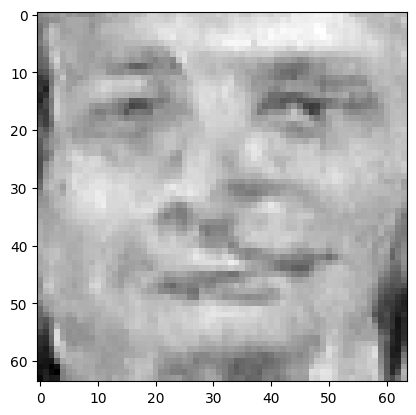

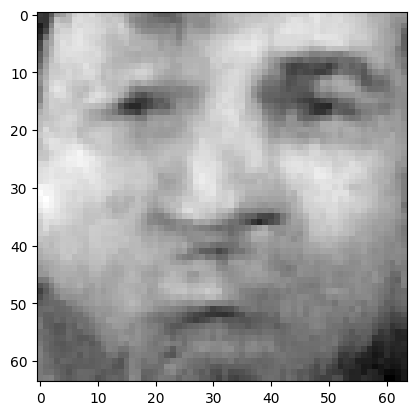

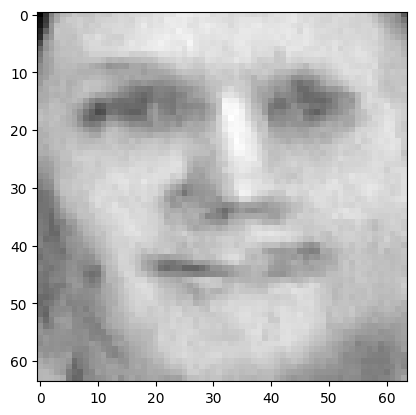

Epoch 22 : 


100%|██████████| 50/50 [00:05<00:00,  9.97it/s]


loss 0.082705398735272
Epoch 23 : 


100%|██████████| 50/50 [00:04<00:00, 11.67it/s]


loss 0.09436217976996847
Epoch 24 : 


100%|██████████| 50/50 [00:04<00:00, 10.64it/s]


loss 0.1392633714340334
Epoch 25 : 


100%|██████████| 50/50 [00:02<00:00, 16.70it/s]


loss 0.08106138688691368
Epoch 26 : 


100%|██████████| 50/50 [00:04<00:00, 12.15it/s]


loss 0.10738244168597426
Epoch 27 : 


100%|██████████| 50/50 [00:04<00:00, 10.02it/s]


loss 0.11805644525798768
Epoch 28 : 


100%|██████████| 50/50 [00:04<00:00, 10.49it/s]


loss 0.1032339513143896
Epoch 29 : 


100%|██████████| 50/50 [00:05<00:00,  9.91it/s]


loss 0.11289173577631499
Epoch 30 : 


100%|██████████| 50/50 [00:04<00:00, 11.71it/s]


loss 0.10385626558214217
Epoch 31 : 


100%|██████████| 50/50 [00:04<00:00, 10.05it/s]


loss 0.11572388064817257
Epoch 32 : 


100%|██████████| 50/50 [00:04<00:00, 11.36it/s]


loss 0.07947874492597418
Epoch 33 : 


100%|██████████| 50/50 [00:04<00:00, 11.79it/s]


loss 0.12109513552122543
Epoch 34 : 


100%|██████████| 50/50 [00:04<00:00, 11.05it/s]


loss 0.08548252996362016
Epoch 35 : 


100%|██████████| 50/50 [00:03<00:00, 13.95it/s]


loss 0.11338999620080491
Epoch 36 : 


100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


loss 0.13932676561217897
Epoch 37 : 


100%|██████████| 50/50 [00:04<00:00, 10.80it/s]


loss 0.09432439716050621
Epoch 38 : 


100%|██████████| 50/50 [00:04<00:00, 10.92it/s]


loss 0.1353685055239745
Epoch 39 : 


100%|██████████| 50/50 [00:04<00:00, 11.23it/s]


loss 0.09288949031040482
Epoch 40 : 


100%|██████████| 50/50 [00:04<00:00, 10.42it/s]


loss 0.10042408046566403
Epoch 41 : 


100%|██████████| 50/50 [00:04<00:00, 12.38it/s]


loss 0.07866499231635077
torch.Size([3, 1, 64, 64])


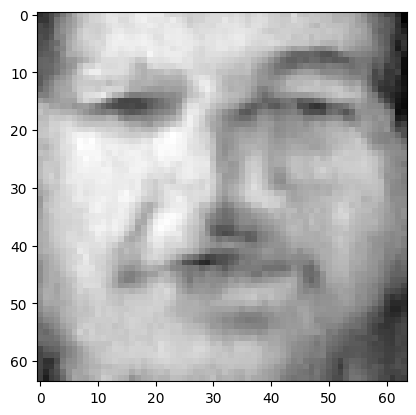

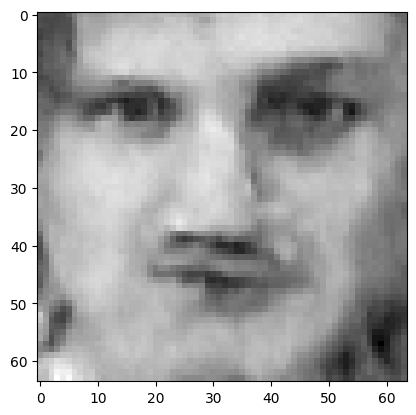

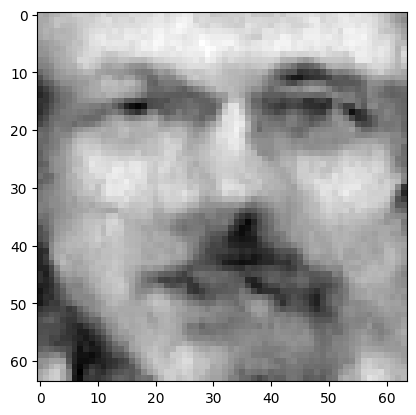

Epoch 42 : 


100%|██████████| 50/50 [00:04<00:00, 10.48it/s]


loss 0.07905952821472784
Epoch 43 : 


100%|██████████| 50/50 [00:04<00:00, 12.42it/s]


loss 0.09259671555908743
Epoch 44 : 


100%|██████████| 50/50 [00:04<00:00, 10.57it/s]


loss 0.10995069177835942
Epoch 45 : 


100%|██████████| 50/50 [00:04<00:00, 11.60it/s]


loss 0.10358327248354254
Epoch 46 : 


100%|██████████| 50/50 [00:03<00:00, 12.54it/s]


loss 0.10301136654987562
Epoch 47 : 


100%|██████████| 50/50 [00:04<00:00, 11.02it/s]


loss 0.10881912413517883
Epoch 48 : 


100%|██████████| 50/50 [00:04<00:00, 11.60it/s]


loss 0.12901318342207235
Epoch 49 : 


100%|██████████| 50/50 [00:04<00:00, 10.61it/s]


loss 0.09275788561486589
Epoch 50 : 


100%|██████████| 50/50 [00:04<00:00, 11.53it/s]


loss 0.09502473888916942
Epoch 51 : 


100%|██████████| 50/50 [00:04<00:00, 10.86it/s]


loss 0.13181389529260068
Epoch 52 : 


100%|██████████| 50/50 [00:03<00:00, 12.71it/s]


loss 0.09588690888145425
Epoch 53 : 


100%|██████████| 50/50 [00:03<00:00, 12.53it/s]


loss 0.10015681191586097
Epoch 54 : 


100%|██████████| 50/50 [00:04<00:00, 10.71it/s]


loss 0.11128473555684341
Epoch 55 : 


100%|██████████| 50/50 [00:03<00:00, 16.48it/s]


loss 0.11970008119156374
Epoch 56 : 


100%|██████████| 50/50 [00:04<00:00, 10.93it/s]


loss 0.15965901087111314
Epoch 57 : 


100%|██████████| 50/50 [00:04<00:00, 10.98it/s]


loss 0.07485796034087348
Epoch 58 : 


100%|██████████| 50/50 [00:04<00:00, 11.60it/s]


loss 0.09638871603493089
Epoch 59 : 


100%|██████████| 50/50 [00:04<00:00, 12.03it/s]


loss 0.11104253161465073
Epoch 60 : 


100%|██████████| 50/50 [00:04<00:00, 11.39it/s]


loss 0.09769083479068398
Epoch 61 : 


100%|██████████| 50/50 [00:03<00:00, 12.87it/s]


loss 0.09153622475880172
torch.Size([3, 1, 64, 64])


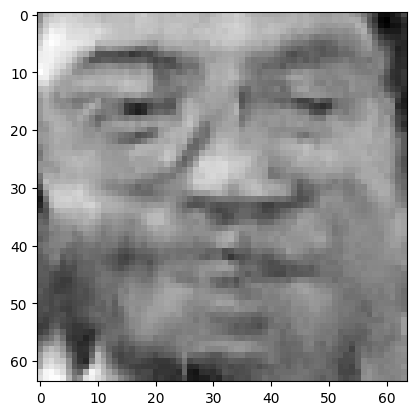

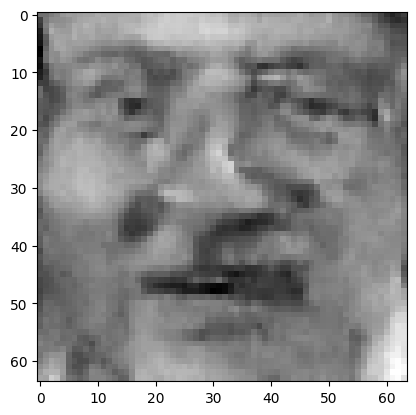

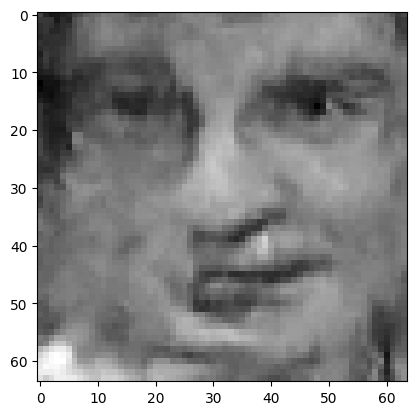

Epoch 62 : 


100%|██████████| 50/50 [00:04<00:00, 10.78it/s]


loss 0.11390140673517095
Epoch 63 : 


100%|██████████| 50/50 [00:04<00:00, 11.63it/s]


loss 0.10223323909597078
Epoch 64 : 


100%|██████████| 50/50 [00:04<00:00, 11.72it/s]


loss 0.16162077917678913
Epoch 65 : 


100%|██████████| 50/50 [00:03<00:00, 14.73it/s]


loss 0.09641036916255853
Epoch 66 : 


100%|██████████| 50/50 [00:04<00:00, 12.06it/s]


loss 0.11880243462249755
Epoch 67 : 


100%|██████████| 50/50 [00:04<00:00, 11.05it/s]


loss 0.10661122756321717
Epoch 68 : 


100%|██████████| 50/50 [00:04<00:00, 12.49it/s]


loss 0.12580267098522385
Epoch 69 : 


100%|██████████| 50/50 [00:04<00:00, 10.99it/s]


loss 0.07734549777920065
Epoch 70 : 


100%|██████████| 50/50 [00:03<00:00, 15.49it/s]


loss 0.1258189480511335
Epoch 71 : 


100%|██████████| 50/50 [00:04<00:00, 11.10it/s]


loss 0.08788627221106399
Epoch 72 : 


100%|██████████| 50/50 [00:03<00:00, 12.79it/s]


loss 0.1114718519124412
Epoch 73 : 


100%|██████████| 50/50 [00:03<00:00, 13.76it/s]


loss 0.11190297912129976
Epoch 74 : 


100%|██████████| 50/50 [00:04<00:00, 12.40it/s]


loss 0.12157735333711489
Epoch 75 : 


100%|██████████| 50/50 [00:04<00:00, 10.63it/s]


loss 0.08262890501214128
Epoch 76 : 


100%|██████████| 50/50 [00:03<00:00, 13.41it/s]


loss 0.09537135463722479
Epoch 77 : 


100%|██████████| 50/50 [00:04<00:00, 10.82it/s]


loss 0.08863997994881527
Epoch 78 : 


100%|██████████| 50/50 [00:04<00:00, 11.76it/s]


loss 0.125866468737025
Epoch 79 : 


100%|██████████| 50/50 [00:03<00:00, 14.63it/s]


loss 0.09150098772532154
Epoch 80 : 


100%|██████████| 50/50 [00:04<00:00, 11.47it/s]


loss 0.10548507473921763
Epoch 81 : 


100%|██████████| 50/50 [00:04<00:00, 12.45it/s]


loss 0.09211476764303034
torch.Size([3, 1, 64, 64])


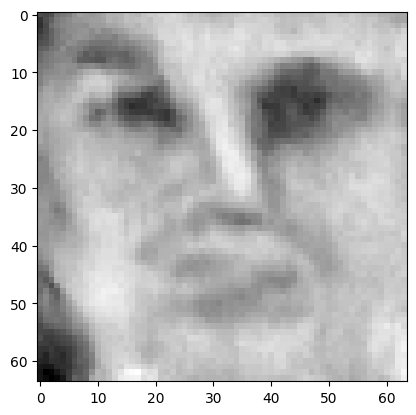

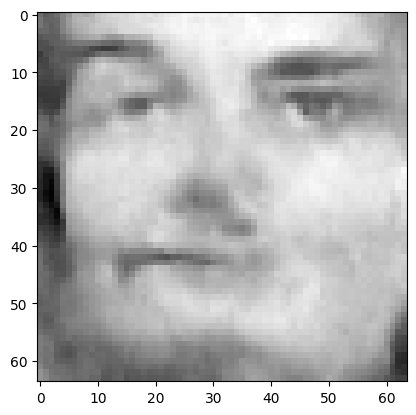

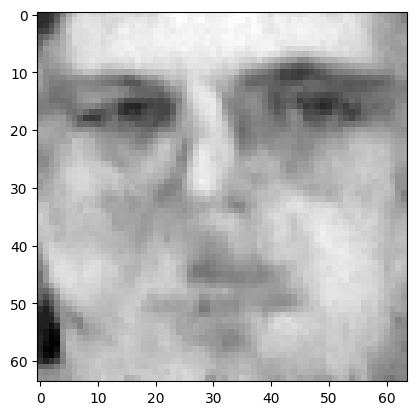

Epoch 82 : 


100%|██████████| 50/50 [00:04<00:00, 11.24it/s]


loss 0.09399251028027729
Epoch 83 : 


100%|██████████| 50/50 [00:04<00:00, 11.70it/s]


loss 0.09576818659701956
Epoch 84 : 


100%|██████████| 50/50 [00:04<00:00, 12.06it/s]


loss 0.11763072252027065
Epoch 85 : 


100%|██████████| 50/50 [00:04<00:00, 12.39it/s]


loss 0.09071642854448352
Epoch 86 : 


100%|██████████| 50/50 [00:03<00:00, 12.70it/s]


loss 0.1176050651369299
Epoch 87 : 


100%|██████████| 50/50 [00:02<00:00, 17.58it/s]


loss 0.11474187441537956
Epoch 88 : 


100%|██████████| 50/50 [00:03<00:00, 12.99it/s]


loss 0.10579673116229862
Epoch 89 : 


100%|██████████| 50/50 [00:04<00:00, 10.77it/s]


loss 0.11239578076205493
Epoch 90 : 


100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


loss 0.12314340733430626
Epoch 91 : 


100%|██████████| 50/50 [00:04<00:00, 11.50it/s]


loss 0.10468695961491732
Epoch 92 : 


100%|██████████| 50/50 [00:04<00:00, 11.80it/s]


loss 0.12339357969529113
Epoch 93 : 


100%|██████████| 50/50 [00:04<00:00, 11.16it/s]


loss 0.09623968662221558
Epoch 94 : 


100%|██████████| 50/50 [00:03<00:00, 13.00it/s]


loss 0.09492987782586645
Epoch 95 : 


100%|██████████| 50/50 [00:03<00:00, 13.51it/s]


loss 0.09267692141758073
Epoch 96 : 


100%|██████████| 50/50 [00:04<00:00, 10.85it/s]


loss 0.1014535055614528
Epoch 97 : 


100%|██████████| 50/50 [00:03<00:00, 13.87it/s]


loss 0.10194500772391284
Epoch 98 : 


100%|██████████| 50/50 [00:03<00:00, 14.60it/s]


loss 0.09278965369640663
Epoch 99 : 


100%|██████████| 50/50 [00:03<00:00, 13.28it/s]


loss 0.11770813715860262
Epoch 100 : 


100%|██████████| 50/50 [00:04<00:00, 12.14it/s]


loss 0.1308415450418723
Epoch 101 : 


100%|██████████| 50/50 [00:04<00:00, 12.32it/s]


loss 0.09614408468071683
torch.Size([3, 1, 64, 64])


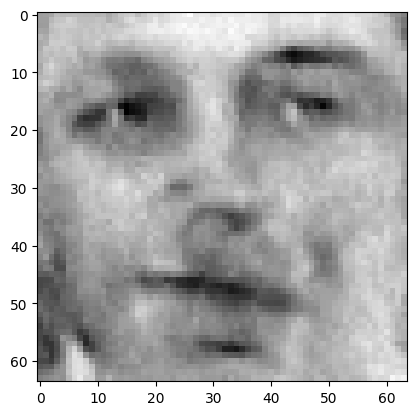

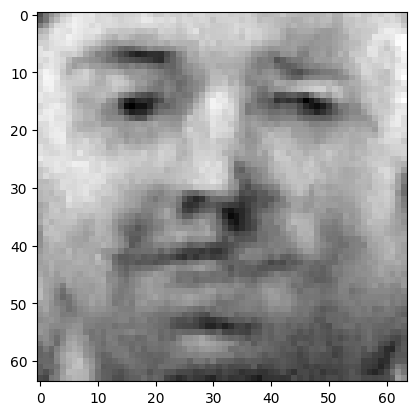

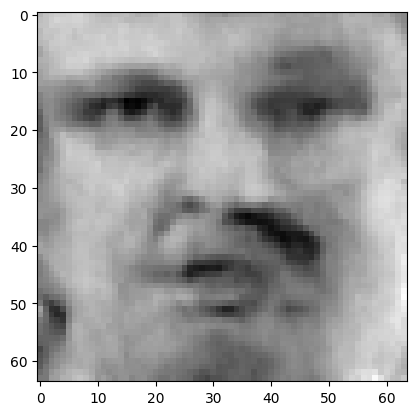

Epoch 102 : 


100%|██████████| 50/50 [00:03<00:00, 12.82it/s]


loss 0.09157058233941748
Epoch 103 : 


100%|██████████| 50/50 [00:04<00:00, 11.27it/s]


loss 0.12090862682619213
Epoch 104 : 


100%|██████████| 50/50 [00:03<00:00, 12.73it/s]


loss 0.09961305988925624
Epoch 105 : 


100%|██████████| 50/50 [00:03<00:00, 16.09it/s]


loss 0.10127620114692239
Epoch 106 : 


100%|██████████| 50/50 [00:04<00:00, 11.22it/s]


loss 0.10067279610594353
Epoch 107 : 


100%|██████████| 50/50 [00:04<00:00, 11.74it/s]


loss 0.12160509760657695
Epoch 108 : 


100%|██████████| 50/50 [00:04<00:00, 11.39it/s]


loss 0.10942528707491658
Epoch 109 : 


100%|██████████| 50/50 [00:04<00:00, 12.28it/s]


loss 0.1257819419753213
Epoch 110 : 


100%|██████████| 50/50 [00:03<00:00, 12.69it/s]


loss 0.10888903788001154
Epoch 111 : 


100%|██████████| 50/50 [00:04<00:00, 10.76it/s]


loss 0.07603744631282006
Epoch 112 : 


100%|██████████| 50/50 [00:03<00:00, 12.93it/s]


loss 0.11773295576069265
Epoch 113 : 


100%|██████████| 50/50 [00:04<00:00, 11.16it/s]


loss 0.10162123806605133
Epoch 114 : 


100%|██████████| 50/50 [00:03<00:00, 13.60it/s]


loss 0.09406690684220188
Epoch 115 : 


100%|██████████| 50/50 [00:03<00:00, 12.60it/s]


loss 0.0964788699054596
Epoch 116 : 


100%|██████████| 50/50 [00:04<00:00, 11.65it/s]


loss 0.10653799682317164
Epoch 117 : 


100%|██████████| 50/50 [00:03<00:00, 16.50it/s]


loss 0.08802045521363026
Epoch 118 : 


100%|██████████| 50/50 [00:03<00:00, 14.88it/s]


loss 0.11075541976900558
Epoch 119 : 


100%|██████████| 50/50 [00:04<00:00, 10.66it/s]


loss 0.10231833815260935
Epoch 120 : 


100%|██████████| 50/50 [00:04<00:00, 12.00it/s]


loss 0.10064223821784679
Epoch 121 : 


100%|██████████| 50/50 [00:04<00:00, 11.95it/s]


loss 0.13199526176283036
torch.Size([3, 1, 64, 64])


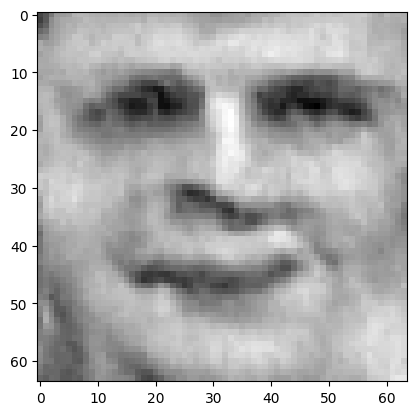

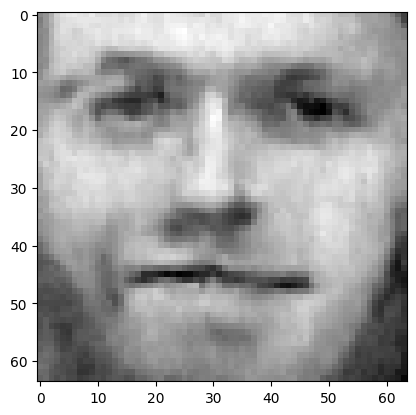

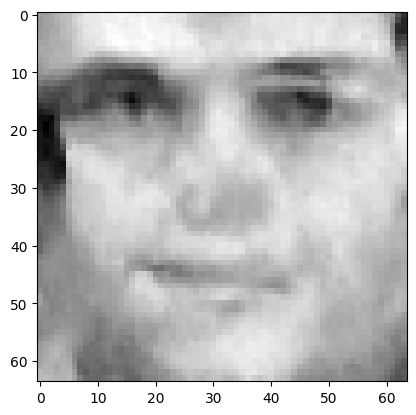

Epoch 122 : 


100%|██████████| 50/50 [00:03<00:00, 15.18it/s]


loss 0.09858231097096273
Epoch 123 : 


100%|██████████| 50/50 [00:04<00:00, 11.14it/s]


loss 0.11699564638798919
Epoch 124 : 


100%|██████████| 50/50 [00:04<00:00, 12.30it/s]


loss 0.06601496369026204
Epoch 125 : 


100%|██████████| 50/50 [00:04<00:00, 10.78it/s]


loss 0.13546276597333737
Epoch 126 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.09861628352720912
Epoch 127 : 


100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


loss 0.0815175889740575
Epoch 128 : 


100%|██████████| 50/50 [00:04<00:00, 10.98it/s]


loss 0.10723626787628321
Epoch 129 : 


100%|██████████| 50/50 [00:03<00:00, 14.01it/s]


loss 0.09933940528141182
Epoch 130 : 


100%|██████████| 50/50 [00:03<00:00, 13.19it/s]


loss 0.11783981510814714
Epoch 131 : 


100%|██████████| 50/50 [00:03<00:00, 12.72it/s]


loss 0.1095616741992915
Epoch 132 : 


100%|██████████| 50/50 [00:03<00:00, 16.61it/s]


loss 0.10562231959930998
Epoch 133 : 


100%|██████████| 50/50 [00:04<00:00, 10.88it/s]


loss 0.09496663873525818
Epoch 134 : 


100%|██████████| 50/50 [00:03<00:00, 12.71it/s]


loss 0.1161728398947506
Epoch 135 : 


100%|██████████| 50/50 [00:04<00:00, 11.25it/s]


loss 0.10511458076195906
Epoch 136 : 


100%|██████████| 50/50 [00:03<00:00, 12.66it/s]


loss 0.11483202939136242
Epoch 137 : 


100%|██████████| 50/50 [00:04<00:00, 11.01it/s]


loss 0.12940318486361244
Epoch 138 : 


100%|██████████| 50/50 [00:03<00:00, 12.50it/s]


loss 0.1255031142373408
Epoch 139 : 


100%|██████████| 50/50 [00:03<00:00, 13.07it/s]


loss 0.10868280885420409
Epoch 140 : 


100%|██████████| 50/50 [00:04<00:00, 11.47it/s]


loss 0.1266015729095484
Epoch 141 : 


100%|██████████| 50/50 [00:03<00:00, 14.28it/s]


loss 0.07962133543287904
torch.Size([3, 1, 64, 64])


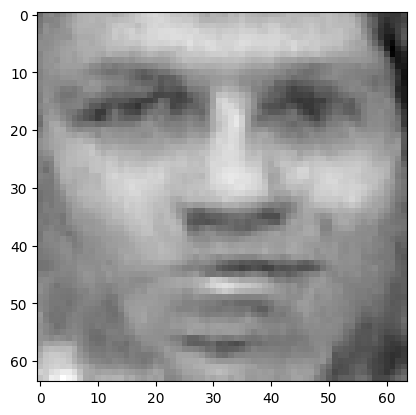

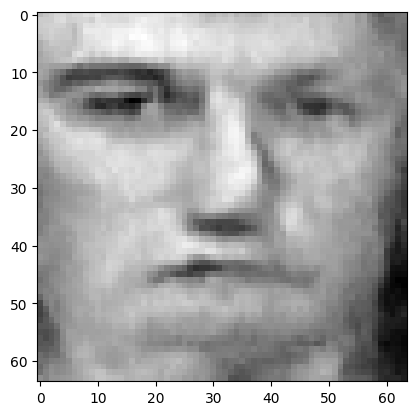

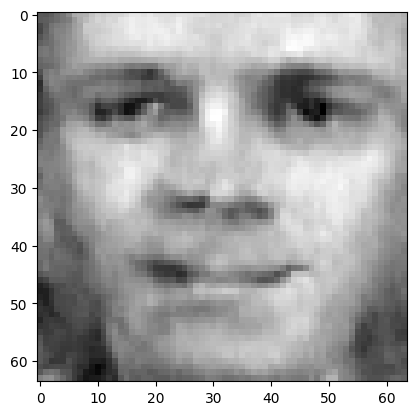

Epoch 142 : 


100%|██████████| 50/50 [00:03<00:00, 12.96it/s]


loss 0.10916153286045237
Epoch 143 : 


100%|██████████| 50/50 [00:04<00:00, 10.75it/s]


loss 0.086401781404875
Epoch 144 : 


100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


loss 0.1240541327515572
Epoch 145 : 


100%|██████████| 50/50 [00:04<00:00, 11.50it/s]


loss 0.10824428063497828
Epoch 146 : 


100%|██████████| 50/50 [00:03<00:00, 13.79it/s]


loss 0.07522934119932816
Epoch 147 : 


100%|██████████| 50/50 [00:03<00:00, 12.50it/s]


loss 0.1038728522209941
Epoch 148 : 


100%|██████████| 50/50 [00:04<00:00, 11.48it/s]


loss 0.0781018200398763
Epoch 149 : 


100%|██████████| 50/50 [00:03<00:00, 13.99it/s]


loss 0.10880527942132924
Epoch 150 : 


100%|██████████| 50/50 [00:04<00:00, 11.19it/s]


loss 0.13770233634516013
Epoch 151 : 


100%|██████████| 50/50 [00:03<00:00, 13.06it/s]


loss 0.09582574519384014
Epoch 152 : 


100%|██████████| 50/50 [00:04<00:00, 11.00it/s]


loss 0.10420158113507835
Epoch 153 : 


100%|██████████| 50/50 [00:03<00:00, 12.87it/s]


loss 0.1243975494289243
Epoch 154 : 


100%|██████████| 50/50 [00:03<00:00, 13.40it/s]


loss 0.08701924561380296
Epoch 155 : 


100%|██████████| 50/50 [00:04<00:00, 11.19it/s]


loss 0.12233681489862727
Epoch 156 : 


100%|██████████| 50/50 [00:03<00:00, 13.53it/s]


loss 0.12469869796103986
Epoch 157 : 


100%|██████████| 50/50 [00:03<00:00, 13.18it/s]


loss 0.10008828084593775
Epoch 158 : 


100%|██████████| 50/50 [00:04<00:00, 12.16it/s]


loss 0.09812471317727305
Epoch 159 : 


100%|██████████| 50/50 [00:03<00:00, 14.22it/s]


loss 0.1047884254686483
Epoch 160 : 


100%|██████████| 50/50 [00:04<00:00, 11.97it/s]


loss 0.10311321569020115
Epoch 161 : 


100%|██████████| 50/50 [00:04<00:00, 12.18it/s]


loss 0.11084288973306536
torch.Size([3, 1, 64, 64])


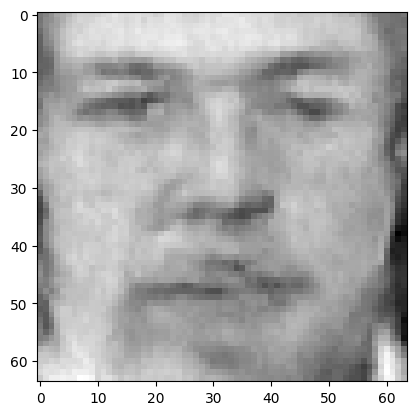

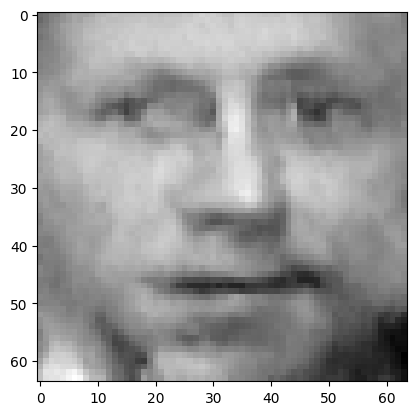

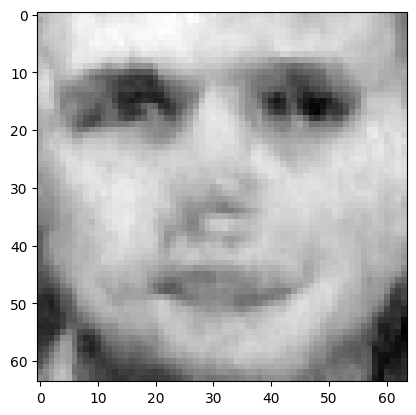

Epoch 162 : 


100%|██████████| 50/50 [00:04<00:00, 11.64it/s]


loss 0.11010123267087218
Epoch 163 : 


100%|██████████| 50/50 [00:03<00:00, 13.14it/s]


loss 0.11181453035867026
Epoch 164 : 


100%|██████████| 50/50 [00:03<00:00, 13.56it/s]


loss 0.09024459739051864
Epoch 165 : 


100%|██████████| 50/50 [00:04<00:00, 11.66it/s]


loss 0.08525207503050591
Epoch 166 : 


100%|██████████| 50/50 [00:03<00:00, 14.61it/s]


loss 0.11785787357967588
Epoch 167 : 


100%|██████████| 50/50 [00:03<00:00, 12.65it/s]


loss 0.08471732991375863
Epoch 168 : 


100%|██████████| 50/50 [00:03<00:00, 14.47it/s]


loss 0.08770031978804878
Epoch 169 : 


100%|██████████| 50/50 [00:03<00:00, 13.36it/s]


loss 0.09030483274449522
Epoch 170 : 


100%|██████████| 50/50 [00:04<00:00, 10.63it/s]


loss 0.10743034036287163
Epoch 171 : 


100%|██████████| 50/50 [00:03<00:00, 13.04it/s]


loss 0.15120192637648058
Epoch 172 : 


100%|██████████| 50/50 [00:04<00:00, 11.29it/s]


loss 0.07911388581099195
Epoch 173 : 


100%|██████████| 50/50 [00:03<00:00, 12.73it/s]


loss 0.09349067187282178
Epoch 174 : 


100%|██████████| 50/50 [00:03<00:00, 12.72it/s]


loss 0.16513921405584842
Epoch 175 : 


100%|██████████| 50/50 [00:04<00:00, 12.34it/s]


loss 0.08879967645321746
Epoch 176 : 


100%|██████████| 50/50 [00:03<00:00, 14.24it/s]


loss 0.09968492040001667
Epoch 177 : 


100%|██████████| 50/50 [00:03<00:00, 14.94it/s]


loss 0.12110340814136955
Epoch 178 : 


100%|██████████| 50/50 [00:04<00:00, 11.23it/s]


loss 0.07716478409516532
Epoch 179 : 


100%|██████████| 50/50 [00:04<00:00, 11.63it/s]


loss 0.1350956353353383
Epoch 180 : 


100%|██████████| 50/50 [00:03<00:00, 12.68it/s]


loss 0.10499616898708466
Epoch 181 : 


100%|██████████| 50/50 [00:04<00:00, 10.93it/s]


loss 0.09646827016192117
torch.Size([3, 1, 64, 64])


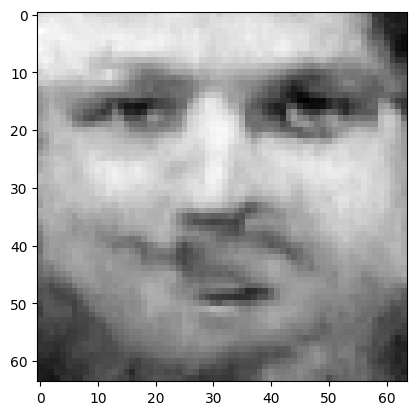

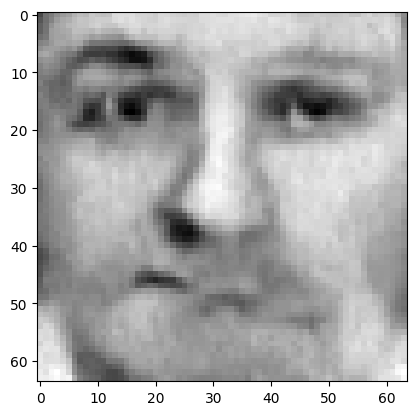

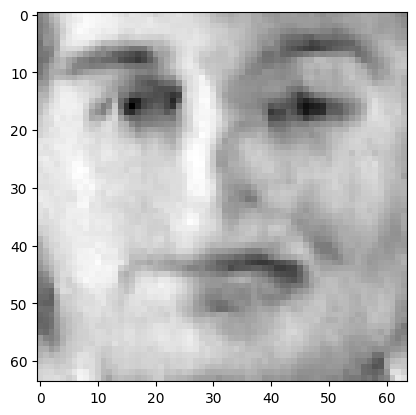

Epoch 182 : 


100%|██████████| 50/50 [00:04<00:00, 11.02it/s]


loss 0.08972131118315897
Epoch 183 : 


100%|██████████| 50/50 [00:03<00:00, 12.90it/s]


loss 0.06811980518662354
Epoch 184 : 


100%|██████████| 50/50 [00:04<00:00, 11.07it/s]


loss 0.08291795608817867
Epoch 185 : 


100%|██████████| 50/50 [00:03<00:00, 12.76it/s]


loss 0.11423075579026407
Epoch 186 : 


100%|██████████| 50/50 [00:03<00:00, 13.61it/s]


loss 0.1132540575312143
Epoch 187 : 


100%|██████████| 50/50 [00:04<00:00, 10.92it/s]


loss 0.10198445157630151
Epoch 188 : 


100%|██████████| 50/50 [00:04<00:00, 12.24it/s]


loss 0.12924823944660996
Epoch 189 : 


100%|██████████| 50/50 [00:04<00:00, 11.42it/s]


loss 0.07669174016571104
Epoch 190 : 


100%|██████████| 50/50 [00:04<00:00, 12.43it/s]


loss 0.10957397600457291
Epoch 191 : 


100%|██████████| 50/50 [00:03<00:00, 12.50it/s]


loss 0.11086209420094298
Epoch 192 : 


100%|██████████| 50/50 [00:03<00:00, 12.90it/s]


loss 0.10009462329536521
Epoch 193 : 


100%|██████████| 50/50 [00:04<00:00, 11.25it/s]


loss 0.0994735988239458
Epoch 194 : 


100%|██████████| 50/50 [00:03<00:00, 15.20it/s]


loss 0.10997858736927899
Epoch 195 : 


100%|██████████| 50/50 [00:04<00:00, 11.89it/s]


loss 0.10766035356958448
Epoch 196 : 


100%|██████████| 50/50 [00:04<00:00, 11.69it/s]


loss 0.14154077178090066
Epoch 197 : 


100%|██████████| 50/50 [00:04<00:00, 11.79it/s]


loss 0.1434149569747688
Epoch 198 : 


100%|██████████| 50/50 [00:04<00:00, 12.24it/s]


loss 0.11390346337612375
Epoch 199 : 


100%|██████████| 50/50 [00:04<00:00, 10.85it/s]


loss 0.06892036291586617


In [9]:
train_ddpm(200, 0.0005, 0.99, 0.0000)